***
![Netflix-Logo.png](..\Images\Netflix-Logo.png)
# `Projeto:` Análise da Saúde Financeira da Empresa Netflix

## `Data:` novembro, 2020

## `Cientista de Dados:` Walter Trevisan

***
## `04-` Statistic Inference:

Nesta fase, vamos realizar as seguintes atividades:

1. **Carregar** o *dataset* transformado que foi salvo na fase **`02- Get The Data`**;


2. Nesta fase realizaremos alguns **testes estatísticos** para fazermos algumas **inferências** sobre os dados. Estas inferências nos auxiliarão a responder algumas questões sobre a saúde financeira da empresa Netflix.

***
## Setup
>### Pacotes e Funções

In [1]:
# Carregando os pacotes:
sprintf('Loading "feather" package...')
library(feather)

sprintf('Loading "tidyverse" package...')
library(tidyverse)

sprintf('Loading "ggplot2" package...')
library(ggplot2)

sprintf('Loading "gridExtra" package...')
library(gridExtra)

# Configurando o diretório de trabalho:
setwd("D:/Portfolio/Netflix-Analise_Saude_Financeira/Solution")

# Definindo o diretório e o nome onde está armazenado o dataset transformado do projeto:
PROJECT_DATASET_DIR = "./Data/"
PROJECT_DATASET_FILE = "netflix_df.feather"

# Definindo o nome completo (path) onde está armazenado o dataset transformado do projeto:
PROJECT_DATASET_PATH = paste(PROJECT_DATASET_DIR,PROJECT_DATASET_FILE, sep = "")

# Definindo o diretório raiz onde ficarão armazenadas todas as "Imagens" (Gráficos) do Projeto:
PROJECT_IMG_PATH = "./Images/"
# Criando o diretório, se ele não existir:
if (dir.exists(PROJECT_IMG_PATH) == FALSE){
    dir.create(PROJECT_IMG_PATH)
}

# Definindo o diretório onde ficarão armazenadas as "Imagens" (Gráficos) desta fase do Projeto:
PROJECT_IMG_PATH = "./Images/04-Statistic_Inference/"
# Criando o diretório, se ele não existir:
if (dir.exists(PROJECT_IMG_PATH) == FALSE){
    dir.create(PROJECT_IMG_PATH)
}

# Definindo o diretório onde ficará armazenado o "dataset" do projeto como um objeto "dataframe":
PROJECT_DATA_PATH = "./Data/"
# Criando o diretório, se ele não existir:
if (dir.exists(PROJECT_DATA_PATH) == FALSE){
    dir.create(PROJECT_DATA_PATH)
}

sprintf("Diretórios do projeto:")
list.dirs(path = "..", full.names = TRUE, recursive = TRUE)

# Configura a linguagem para o ambiente de desenvolvimento:
Sys.setenv(LANGUAGE = "en")

sprintf("Setup Complete!")

[1] "Loading \"feather\" package..."

[1] "Loading \"tidyverse\" package..."

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


[1] "Loading \"ggplot2\" package..."

[1] "Loading \"gridExtra\" package..."


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



[1] "Diretórios do projeto:"

[1] ".."                                       
 [2] "../BusinessProblem"                       
 [3] "../Datasets"                              
 [4] "../Images"                                
 [5] "../Solution"                              
 [6] "../Solution/.ipynb_checkpoints"           
 [7] "../Solution/Data"                         
 [8] "../Solution/Images"                       
 [9] "../Solution/Images/03-Explore_The_Data"   
[10] "../Solution/Images/04-Statistic_Inference"
[11] "../StoryTelling"

[1] "Setup Complete!"

***
## Funções:

In [2]:
# Função para criar um dataframe onde serão definidos os parâmetros e resultados do teste-t:
data.frame.t_teste <- function(ano1, ano2, feature, H1, NC = 0.95){
    # Criando o data frame:
    df_teste_t = data.frame(ano2, ano1, stringsAsFactors = FALSE)

    # Definindo a variável (feature) utilizada no teste-t:
    df_teste_t$feature = feature

    # Definindo a hipótese alternativa (H1) do teste-t:
    df_teste_t$H1 = H1

    # Definindo o nível de confiança (NC) do teste-t:
    df_teste_t$NC = NC # 95% é o default, ou seja, alpha = 5%.

    # Criando a variável "valor_p" onde será armazenado o resultado do teste-t:
    df_teste_t$valor_p = 0
    
    return (df_teste_t)
}

In [3]:
# Função para realizarmos o "teste-t" com mais de duas amostras:
teste_t <- function(ano1, ano2, feature, H1, NC = 0.95){
    # Criando o data frame onde serão armazenados os parâmetros e resultados do teste-t:
    df_teste_t = data.frame.t_teste(ano1, ano2, feature, H1, NC = 0.95)
    
    # Realizando o teste-t em cada linha do data frame:
    for (i in 1:dim(df_teste_t)[1]){
        
        # Define os vetores com os dados que serão testados:
        data1 = subset(df_data, ano == df_teste_t[i, "ano1"])[, feature]
        data2 = subset(df_data, ano == df_teste_t[i, "ano2"])[, feature]
        
        # Realiza o teste-t:
        resultado = t.test(x = data2, y = data1, alternative = df_teste_t[i, "H1"], conf.level = df_teste_t[i, "NC"])
        
        # Armazena o "valor-p" no data frame:
        df_teste_t[i, "valor_p"] = resultado$p.value
    }
    
    # Retorna os resultados do teste-t:
    return(df_teste_t)
}

***
## `01-` Carregando o *dataset* em um objeto `dataframe`:

In [4]:
# Fazendo a leitura do dataset, salvando os dados em um objeto "dataframe":
df_data <- read_feather(path = PROJECT_DATASET_PATH)
head(df_data)

data,total_clientes,clientes_atuais,clientes_novos,receita_total,custo_da_receita,custo_marketing,lucro_de_contribuicao,margem_de_contribuicao,custo_por_cliente,receita_por_cliente,rendimento_por_cliente,segmento,trimestre,ano,custo_total,prop_clientes_novos,trimestre_cat,ano_cat
2012-03-31,23410,22022,1388,506665,360776,79381,66508,0.131,15.41119,21.64310,6.231909,Streaming,1,2012,440157,0.05929090,Q1,2012
2012-06-30,23938,22686,1252,532705,378574,70959,83172,0.156,15.81477,22.25353,6.438758,Streaming,2,2012,449533,0.05230178,Q2,2012
2012-09-30,25101,23801,1300,556027,399124,65955,90948,0.164,15.90072,22.15159,6.250866,Streaming,3,2012,465079,0.05179077,Q3,2012
2012-12-31,27146,25471,1675,589471,420390,59777,109304,0.185,15.48626,21.71484,6.228579,Streaming,4,2012,480167,0.06170338,Q4,2012
2013-03-31,29174,27913,1261,638649,440334,66965,131350,0.206,15.09337,21.89103,6.797662,Streaming,1,2013,507299,0.04322342,Q1,2013
2013-06-30,29807,28624,1183,671089,452598,67177,151314,0.225,15.18429,22.51448,7.330191,Streaming,2,2013,519775,0.03968866,Q2,2013


***
## `02-` Inferência Estatística:

### `2.1-` Verificar se existe alguma relação de dependência (considerando todo o período) entre a *receita total da empresa* e o volume *total de clientes*, o volume de *clientes atuais* e o volume de *novos clientes*.

Para fazermos esta análise, vamos plotar alguns **gráficos de dispersão** e em seguida calcular/testar os *coeficientes de correlação* entre as variáveis:

### Clientes versus Receita Total:

Saving 6.67 x 6.67 in image


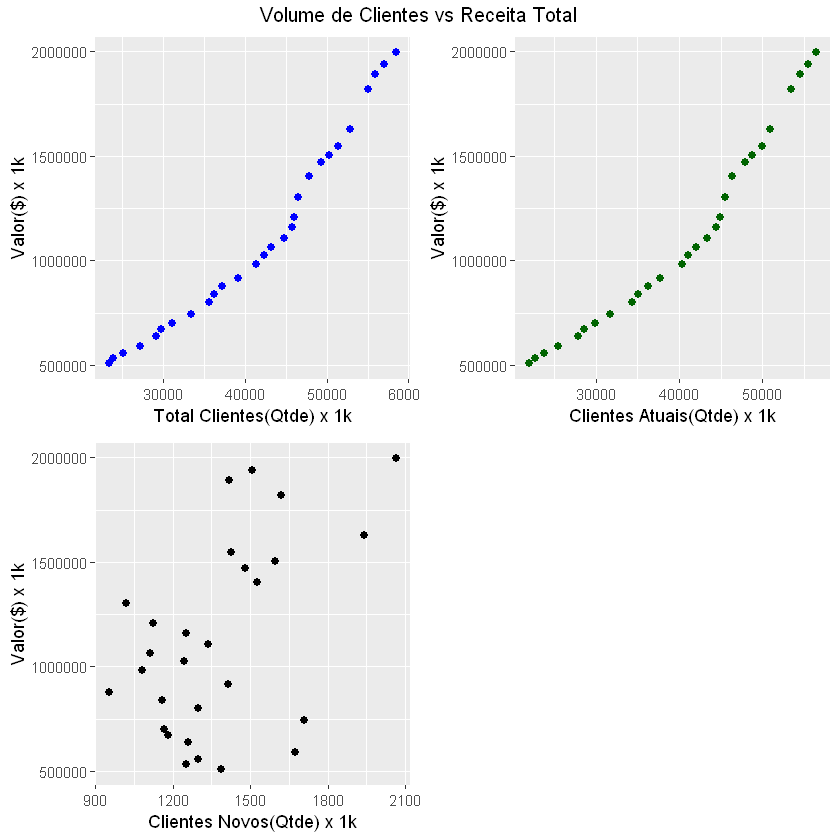

In [5]:
# Volume total de clientes vs receita total:
p1 <- ggplot(data = df_data, aes(x = total_clientes, y = receita_total)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Total Clientes(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes atuais vs receita total:
p2 <- ggplot(data = df_data, aes(x = clientes_atuais, y = receita_total)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Atuais(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes novos vs receita total:
p3 <- ggplot(data = df_data, aes(x = clientes_novos, y = receita_total)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'black') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Novos(Qtde) x 1k", y = "Valor($) x 1k")

# Combina os 3 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, nrow=2, ncol=2, top = "Volume de Clientes vs Receita Total")

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "scatter_plot_clientes_vs_receita_total.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Para os gráficos `Total Clientes vc Receita Total` e `Clientes Atuais vc Receita Total`, observamos uma forte **correlação positiva** entre os clientes e a receita total da empresa;


* Entretanto, para o gráfico `Clientes Novos vc Receita Total`, observamos uma correlação positiva entre os clientes novos e a receita total da empresa.

Então, vamos realizar *testes de hipóteses* para calcularmos as correlações e verificarmos se existe alguma dependência entre as variáveis.

In [6]:
# Testes de hipóteses:
# 01- Vamos calcular e testar a "correlação" entre o volume "Total Clientes" e a "Receita Total" da empresa:
sprintf("Testando coeficiente de correlação: Total Clientes vs Receita Total")
with(df_data, cor.test(total_clientes, receita_total, alternative = "greater"))

# 02- Vamos calcular e testar a "correlação" entre o volume de "Clientes Atuais" e a "Receita Total" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Atuais vs Receita Total")
with(df_data, cor.test(clientes_atuais, receita_total, alternative = "greater"))

# 03- Vamos calcular e testar a "correlação" entre o volume de "Clientes Novos" e a "Receita Total" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Novos vs Receita Total")
with(df_data, cor.test(clientes_novos, receita_total, alternative = "greater"))

[1] "Testando coeficiente de correlação: Total Clientes vs Receita Total"


	Pearson's product-moment correlation

data:  total_clientes and receita_total
t = 21.912, df = 26, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9503558 1.0000000
sample estimates:
      cor 
0.9739771 


[1] "Testando coeficiente de correlação: Clientes Atuais vs Receita Total"


	Pearson's product-moment correlation

data:  clientes_atuais and receita_total
t = 20.735, df = 26, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.94488 1.00000
sample estimates:
      cor 
0.9710681 


[1] "Testando coeficiente de correlação: Clientes Novos vs Receita Total"


	Pearson's product-moment correlation

data:  clientes_novos and receita_total
t = 2.8284, df = 26, p-value = 0.004445
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.1979726 1.0000000
sample estimates:
      cor 
0.4850694 


**Conclusão:**

* **`Total Clientes vs Receita Total`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.974`) entre as variáveis, ou seja, **a medida que aumenta o volume total de clientes aumenta a receita total da empresa**. Portanto, **a receita total é dependente do volume total de clientes**;


* **`Clientes Atuais vs Receita Total`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.971`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes atuais aumenta a receita total da empresa**. Portanto, **a receita total é dependente do volume de clientes atuais**;


* **`Clientes Novos vs Receita Total`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.485`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes novos aumenta a receita total da empresa**. Portanto, **a receita total é dependente do volume de clientes novos**.

### `2.2-` Verificar se existe alguma relação de dependência (considerando todo o período) entre o *custo total da empresa* e o volume *total de clientes*, o volume de *clientes atuais* e o volume de *novos clientes*.

Para fazermos esta análise, vamos plotar alguns **gráficos de dispersão** e em seguida calcular/testar os *coeficientes de correlação* entre as variáveis:

### Clientes versus Custo Total:

Saving 6.67 x 6.67 in image


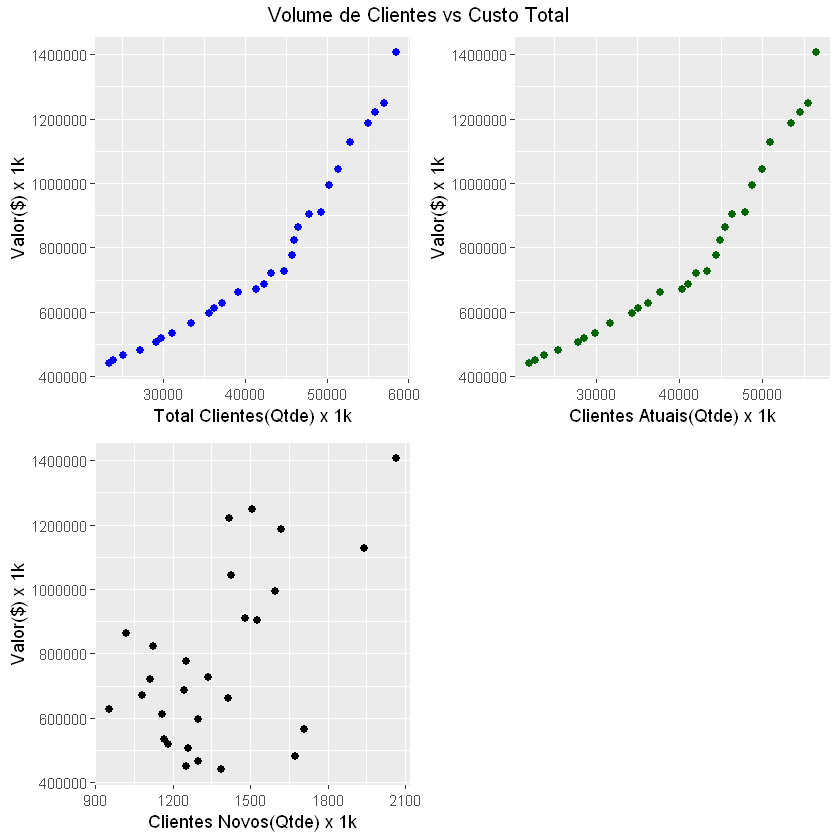

In [7]:
# Volume total de clientes vs custo total:
p1 <- ggplot(data = df_data, aes(x = total_clientes, y = custo_total)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Total Clientes(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes atuais vs custo total:
p2 <- ggplot(data = df_data, aes(x = clientes_atuais, y = custo_total)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Atuais(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes novos vs custo total:
p3 <- ggplot(data = df_data, aes(x = clientes_novos, y = custo_total)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'black') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Novos(Qtde) x 1k", y = "Valor($) x 1k")

# Combina os 3 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, nrow=2, ncol=2, top = "Volume de Clientes vs Custo Total")

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "scatter_plot_clientes_vs_custo_total.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Para os gráficos `Total Clientes vc Custo Total` e `Clientes Atuais vc Custo Total`, observamos uma forte **correlação positiva** entre os clientes e o custo total da empresa;


* Entretanto, para o gráfico `Clientes Novos vc Custo Total`, observamos uma correlação positiva entre os clientes novos e o custo total da empresa.

Então, vamos realizar *testes de hipóteses* para calcularmos as correlações e verificarmos se existe alguma dependência entre as variáveis.

In [8]:
# Testes de hipóteses:
# 01- Vamos calcular e testar a "correlação" entre o volume "Total Clientes" e o "Custo Total" da empresa:
sprintf("Testando coeficiente de correlação: Total Clientes vs Custo Total")
with(df_data, cor.test(total_clientes, custo_total, alternative = "greater"))

# 02- Vamos calcular e testar a "correlação" entre o volume de "Clientes Atuais" e o "Custo Total" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Atuais vs Custo Total")
with(df_data, cor.test(clientes_atuais, custo_total, alternative = "greater"))

# 03- Vamos calcular e testar a "correlação" entre o volume de "Clientes Novos" e o "Custo Total" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Novos vs Custo Total")
with(df_data, cor.test(clientes_novos, custo_total, alternative = "greater"))

[1] "Testando coeficiente de correlação: Total Clientes vs Custo Total"


	Pearson's product-moment correlation

data:  total_clientes and custo_total
t = 16.027, df = 26, p-value = 2.709e-15
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9110706 1.0000000
sample estimates:
      cor 
0.9529331 


[1] "Testando coeficiente de correlação: Clientes Atuais vs Custo Total"


	Pearson's product-moment correlation

data:  clientes_atuais and custo_total
t = 15.244, df = 26, p-value = 8.834e-15
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9026139 1.0000000
sample estimates:
      cor 
0.9483497 


[1] "Testando coeficiente de correlação: Clientes Novos vs Custo Total"


	Pearson's product-moment correlation

data:  clientes_novos and custo_total
t = 3.3054, df = 26, p-value = 0.001385
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.2736295 1.0000000
sample estimates:
      cor 
0.5439537 


**Conclusão:**

* **`Total Clientes vs Custo Total`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.953`) entre as variáveis, ou seja, **a medida que aumenta o volume total de clientes aumenta o custo total da empresa**. Portanto, **o custo total é dependente do volume total de clientes**;


* **`Clientes Atuais vs Custo Total`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.948`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes atuais aumenta o custo total da empresa**. Portanto, **o custo total é dependente do volume de clientes atuais**;


* **`Clientes Novos vs Custo Total`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.544`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes novos aumenta o custo total da empresa**. Portanto, **o custo total é dependente do volume de clientes novos**.

### `2.3-` Verificar se existe alguma relação de dependência (considerando todo o período) entre o *custo da receita da empresa* e o volume *total de clientes*, o volume de *clientes atuais* e o volume de *novos clientes*.

Para fazermos esta análise, vamos plotar alguns **gráficos de dispersão** e em seguida calcular/testar os *coeficientes de correlação* entre as variáveis:

### Clientes versus Custo da Receita:

Saving 6.67 x 6.67 in image


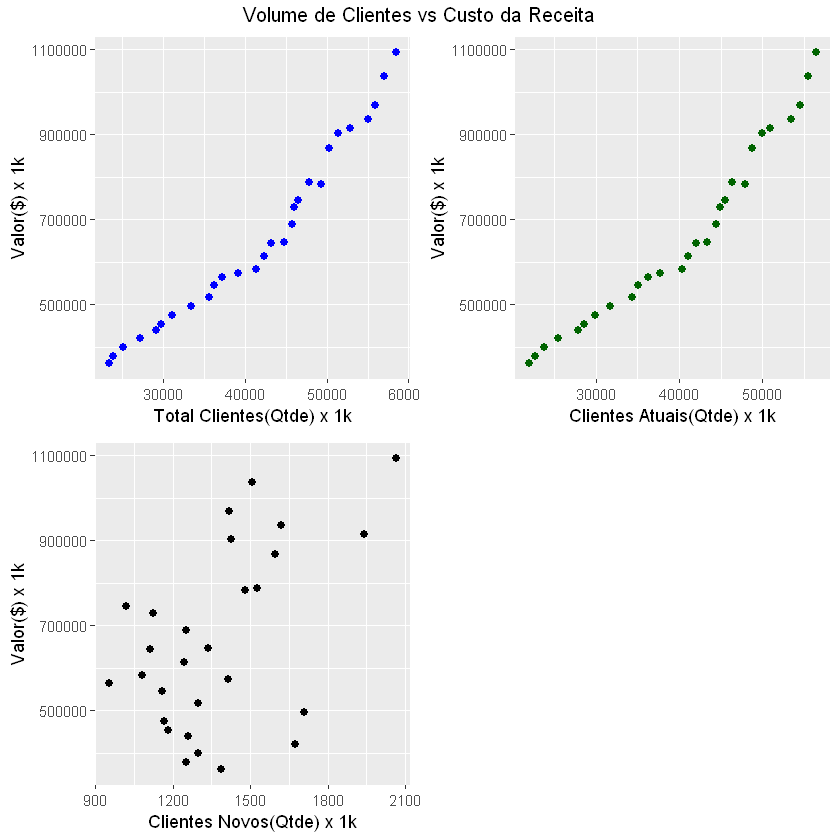

In [9]:
# Volume total de clientes vs custo da receita:
p1 <- ggplot(data = df_data, aes(x = total_clientes, y = custo_da_receita)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Total Clientes(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes atuais vs custo da receita:
p2 <- ggplot(data = df_data, aes(x = clientes_atuais, y = custo_da_receita)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Atuais(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes novos vs custo da receita:
p3 <- ggplot(data = df_data, aes(x = clientes_novos, y = custo_da_receita)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'black') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Novos(Qtde) x 1k", y = "Valor($) x 1k")

# Combina os 3 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, nrow=2, ncol=2, top = "Volume de Clientes vs Custo da Receita")

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "scatter_plot_clientes_vs_custo_receita.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Para os gráficos `Total Clientes vc Custo da Receita` e `Clientes Atuais vc Custo da Receita`, observamos uma forte **correlação positiva** entre os clientes e o custo da receita da empresa;


* Entretanto, para o gráfico `Clientes Novos vc Custo da Receita`, observamos uma correlação positiva entre os clientes novos e o custo da receita da empresa.

Então, vamos realizar *testes de hipóteses* para calcularmos as correlações e verificarmos se existe alguma dependência entre as variáveis.

In [10]:
# Testes de hipóteses:
# 01- Vamos calcular e testar a "correlação" entre o volume "Total Clientes" e o "Custo da Receita" da empresa:
sprintf("Testando coeficiente de correlação: Total Clientes vs Custo da Receita")
with(df_data, cor.test(total_clientes, custo_da_receita, alternative = "greater"))

# 02- Vamos calcular e testar a "correlação" entre o volume de "Clientes Atuais" e o "Custo da Receita" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Atuais vs Custo da Receita")
with(df_data, cor.test(clientes_atuais, custo_da_receita, alternative = "greater"))

# 03- Vamos calcular e testar a "correlação" entre o volume de "Clientes Novos" e o "Custo da Receita" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Novos vs Custo da Receita")
with(df_data, cor.test(clientes_novos, custo_da_receita, alternative = "greater"))

[1] "Testando coeficiente de correlação: Total Clientes vs Custo da Receita"


	Pearson's product-moment correlation

data:  total_clientes and custo_da_receita
t = 22.566, df = 26, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9530546 1.0000000
sample estimates:
      cor 
0.9754079 


[1] "Testando coeficiente de correlação: Clientes Atuais vs Custo da Receita"


	Pearson's product-moment correlation

data:  clientes_atuais and custo_da_receita
t = 21.218, df = 26, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9472326 1.0000000
sample estimates:
      cor 
0.9723188 


[1] "Testando coeficiente de correlação: Clientes Novos vs Custo da Receita"


	Pearson's product-moment correlation

data:  clientes_novos and custo_da_receita
t = 2.8878, df = 26, p-value = 0.003857
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.2077179 1.0000000
sample estimates:
      cor 
0.4928032 


**Conclusão:**

* **`Total Clientes vs Custo da Receita`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.975`) entre as variáveis, ou seja, **a medida que aumenta o volume total de clientes aumenta o custo da receita**. Portanto, **o custo da receita é dependente do volume total de clientes**;


* **`Clientes Atuais vs Custo da Receita`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.972`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes atuais aumenta o custo da receita**. Portanto, **o custo da receita é dependente do volume de clientes atuais**;


* **`Clientes Novos vs Custo da Receita`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.493`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes novos aumenta o custo da receita**. Portanto, **o custo da receita é dependente do volume de clientes novos**.

### `2.4-` Verificar se existe alguma relação de dependência (considerando todo o período) entre o *custo de marketing da empresa* e o volume *total de clientes*, o volume de *clientes atuais* e o volume de *novos clientes*.

Para fazermos esta análise, vamos plotar alguns **gráficos de dispersão** e em seguida calcular/testar os *coeficientes de correlação* entre as variáveis:

### Clientes versus Custo de Marketing:

Saving 6.67 x 6.67 in image


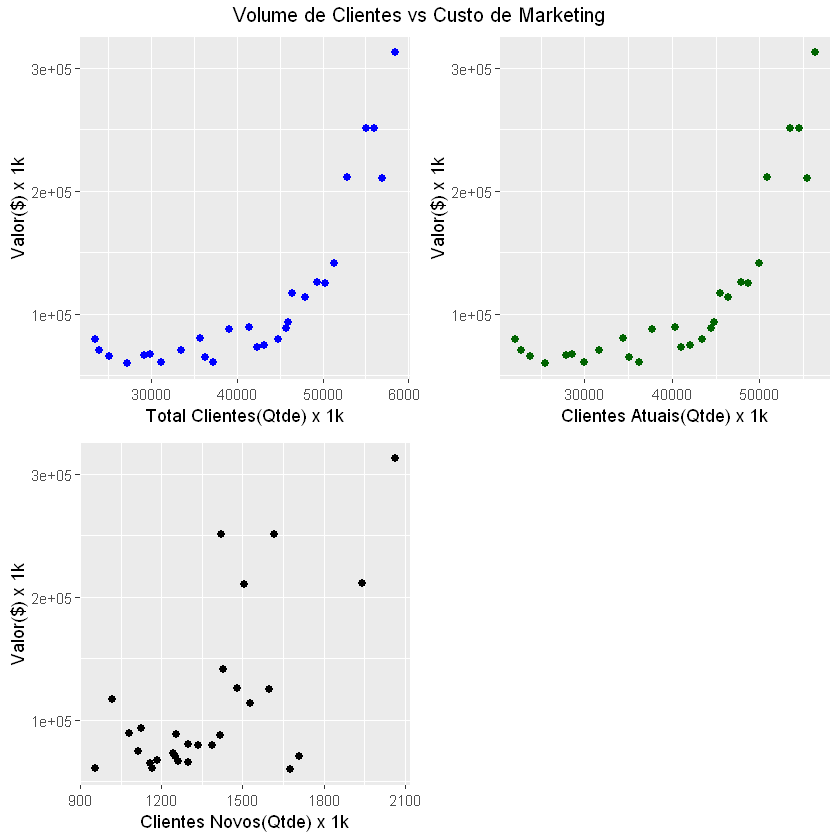

In [11]:
# Volume total de clientes vs custo de marketing:
p1 <- ggplot(data = df_data, aes(x = total_clientes, y = custo_marketing)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'blue') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Total Clientes(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes atuais vs custo de marketing:
p2 <- ggplot(data = df_data, aes(x = clientes_atuais, y = custo_marketing)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Atuais(Qtde) x 1k", y = "Valor($) x 1k")

# Volume de clientes novos vs custo de marketing:
p3 <- ggplot(data = df_data, aes(x = clientes_novos, y = custo_marketing)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'black') +

            # Definindo labels para os eixos "x" e "y" e um título para o gráfico:
            labs(x = "Clientes Novos(Qtde) x 1k", y = "Valor($) x 1k")

# Combina os 3 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, nrow=2, ncol=2, top = "Volume de Clientes vs Custo de Marketing")

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "scatter_plot_clientes_vs_custo_marketing.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Para os gráficos `Total Clientes vc Custo de Marketing`, `Clientes Atuais vc Custo de Marketing` e `Clientes Novos vc Custo de Marketing`, observamos uma **correlação positiva** entre os clientes e o custo de marketing da empresa.

Então, vamos realizar *testes de hipóteses* para calcularmos as correlações e verificarmos se existe alguma dependência entre as variáveis.

In [12]:
# Testes de hipóteses:
# 01- Vamos calcular e testar a "correlação" entre o volume "Total Clientes" e o "Custo de Marketing" da empresa:
sprintf("Testando coeficiente de correlação: Total Clientes vs Custo de Marketing")
with(df_data, cor.test(total_clientes, custo_marketing, alternative = "greater"))

# 02- Vamos calcular e testar a "correlação" entre o volume de "Clientes Atuais" e o "Custo de Marketing" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Atuais vs Custo de Marketing")
with(df_data, cor.test(clientes_atuais, custo_marketing, alternative = "greater"))

# 03- Vamos calcular e testar a "correlação" entre o volume de "Clientes Novos" e o "Custo de Marketing" da empresa:
sprintf("Testando coeficiente de correlação: Clientes Novos vs Custo de Marketing")
with(df_data, cor.test(clientes_novos, custo_marketing, alternative = "greater"))

[1] "Testando coeficiente de correlação: Total Clientes vs Custo de Marketing"


	Pearson's product-moment correlation

data:  total_clientes and custo_marketing
t = 6.5814, df = 26, p-value = 2.795e-07
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.6314412 1.0000000
sample estimates:
      cor 
0.7905063 


[1] "Testando coeficiente de correlação: Clientes Atuais vs Custo de Marketing"


	Pearson's product-moment correlation

data:  clientes_atuais and custo_marketing
t = 6.3921, df = 26, p-value = 4.512e-07
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.6174437 1.0000000
sample estimates:
      cor 
0.7817418 


[1] "Testando coeficiente de correlação: Clientes Novos vs Custo de Marketing"


	Pearson's product-moment correlation

data:  clientes_novos and custo_marketing
t = 4.3541, df = 26, p-value = 9.239e-05
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.4179819 1.0000000
sample estimates:
      cor 
0.6493737 


**Conclusão:**

* **`Total Clientes vs Custo de marketing`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.790`) entre as variáveis, ou seja, **a medida que aumenta o volume total de clientes aumenta o custo de marketing da empresa**. Portanto, **o custo de marketing é dependente do volume total de clientes**;


* **`Clientes Atuais vs Custo de marketing`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.782`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes atuais aumenta o custo de marketing da empresa**. Portanto, **o custo de marketing é dependente do volume de clientes atuais**;


* **`Clientes Novos vs Custo de marketing`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.649`) entre as variáveis, ou seja, **a medida que aumenta o volume de clientes novos aumenta o custo de marketing da empresa**. Portanto, **o custo de marketing é dependente do volume de clientes novos**.

### `2.5-` Verificar se existe alguma relação de dependência (considerando todo o período) entre o *custo de marketing da empresa* com a *receita total*, com a *margem de contribuição* e com os *rendimentos por cliente*.

Para fazermos esta análise, vamos plotar alguns **gráficos de dispersão** e em seguida calcular/testar os *coeficientes de correlação* entre as variáveis:

Saving 6.67 x 6.67 in image


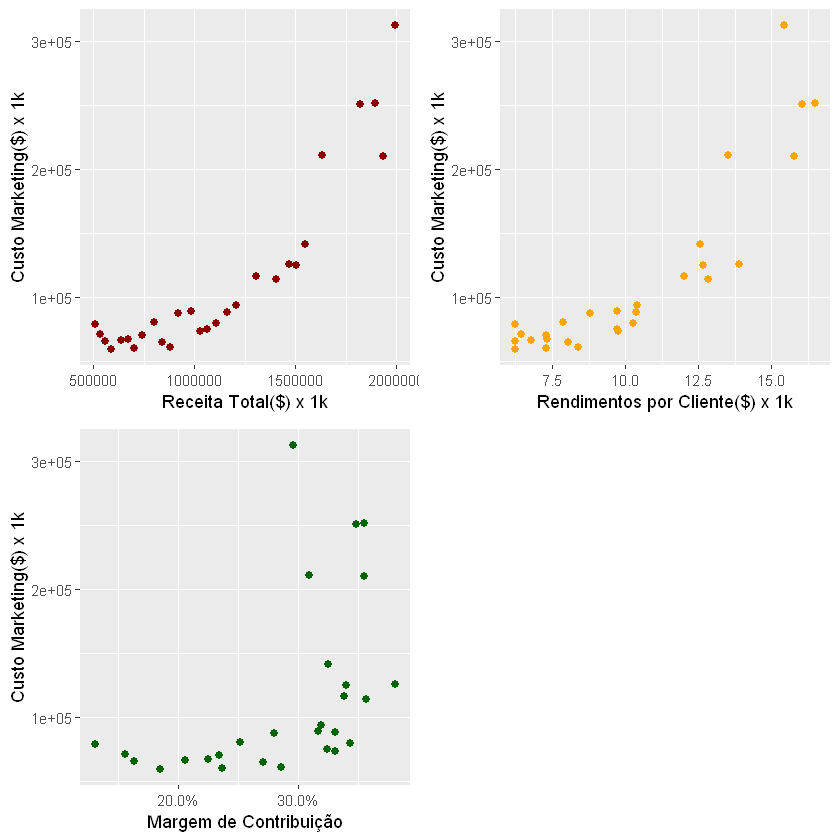

In [13]:
# Custo de Marketing vs Receita Total:
p1 <- ggplot(data = df_data, aes(x = receita_total, y = custo_marketing)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'darkred') +

            # Definindo labels para os eixos "x" e "y":
            labs(x = "Receita Total($) x 1k", y = "Custo Marketing($) x 1k")

# Custo de Marketing vs Rendimentos por Cliente:
p2 <- ggplot(data = df_data, aes(x = rendimento_por_cliente, y = custo_marketing)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'orange') +

            # Definindo labels para os eixos "x" e "y":
            labs(x = "Rendimentos por Cliente($) x 1k", y = "Custo Marketing($) x 1k")

# Custo de Marketing vs Margem de Contribuição:
p3 <- ggplot(data = df_data, aes(x = margem_de_contribuicao, y = custo_marketing)) +
            # Aumentando um pouco o tamanho dos pontos:
            geom_point(size = 2, color = 'darkgreen') +

            # Definindo labels para os eixos "x" e "y":
            labs(x = "Margem de Contribuição", y = "Custo Marketing($) x 1k") +

            # Formatando os valores em "%" para o eixo "x":
            scale_x_continuous(labels = scales::percent)

# Combina os 3 gráficos na mesma área:
g <- arrangeGrob(p1, p2, p3, nrow=2, ncol=2)

# Plot dos gráficos:
grid.arrange(g)

# Salva os gráficos:
ggsave(filename = "scatter_plot_custo_marketing.pdf", plot = g, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* Para os gráficos `Custo Marketing vc Receita Total` e `Custo Marketing vc Rendimentos por Cliente`, observamos uma forte **correlação positiva**;


* Entretanto, para o gráfico `Custo Marketing vc Margem de Contribuição`, observamos uma correlação positiva.

Então, vamos realizar *testes de hipóteses* para calcularmos as correlações e verificarmos se existe alguma dependência entre as variáveis.

In [14]:
# Testes de hipóteses:
# 01- Vamos calcular e testar a "correlação" entre a "Receita Total" e o "Custo de Marketing" da empresa:
sprintf("Testando coeficiente de correlação: Receita Total vs Custo de Marketing")
with(df_data, cor.test(receita_total, custo_marketing, alternative = "greater"))

# 02- Vamos calcular e testar a "correlação" entre os "Rendimentos por Cliente" e o "Custo de Marketing" da empresa:
sprintf("Testando coeficiente de correlação: Rendimentos por Cliente vs Custo de Marketing")
with(df_data, cor.test(rendimento_por_cliente, custo_marketing, alternative = "greater"))

# 03- Vamos calcular e testar a "correlação" entre a "Margem de Contribuição" e o "Custo de Marketing" da empresa:
sprintf("Testando coeficiente de correlação: Margem de Contribuição vs Custo de Marketing")
with(df_data, cor.test(margem_de_contribuicao, custo_marketing, alternative = "greater"))

[1] "Testando coeficiente de correlação: Receita Total vs Custo de Marketing"


	Pearson's product-moment correlation

data:  receita_total and custo_marketing
t = 9.8648, df = 26, p-value = 1.406e-10
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.7950633 1.0000000
sample estimates:
      cor 
0.8883443 


[1] "Testando coeficiente de correlação: Rendimentos por Cliente vs Custo de Marketing"


	Pearson's product-moment correlation

data:  rendimento_por_cliente and custo_marketing
t = 9.2357, df = 26, p-value = 5.404e-10
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.7726735 1.0000000
sample estimates:
      cor 
0.8754385 


[1] "Testando coeficiente de correlação: Margem de Contribuição vs Custo de Marketing"


	Pearson's product-moment correlation

data:  margem_de_contribuicao and custo_marketing
t = 2.6949, df = 26, p-value = 0.006088
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.1757498 1.0000000
sample estimates:
     cor 
0.467264 


**Conclusão:**

* **`Receita Total vs Custo de Marketing`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.888`) entre as variáveis, ou seja, **a medida que aumenta a receita total aumenta o custo de marketing da empresa**. Portanto, **o custo de marketing é dependente da receita total**;


* **`Rendimentos por Cliente vs Custo de Marketing`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma forte correlação positiva (`cor = 0.875`) entre as variáveis, ou seja, **a medida que aumenta os rendimentos por cliente aumenta o custo de marketing da empresa**. Portanto, **o custo de marketing é dependente dos rendimentos por cliente**;


* **`Margem de Contribuição vs Custo de Marketing`**: como `p-value < 0.05` rejeitamos a hipótese nula (H0) e confirmamos que existe uma correlação positiva (`cor = 0.467`) entre as variáveis, ou seja, **a medida que aumenta a margem de contribuição aumenta o custo de marketing da empresa**. Portanto, **o custo de marketing é dependente da margem de contribuição**.

### `2.6-` Considerando todo o período (`2012 a 2018`), o *volume total de clientes aumentou e/ou diminuiu*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** VTMC1 = VTMC2 = VTMC3 = VTMC4 = VTMC5 = VTMC6 = VTMC7, ou seja, os volumes totais médios de clientes (por ano) não diferem entre cada um dos anos, ou seja, em todo o período. 
>2. **`H1`:** o volume total médio de clientes (por ano) é diferente em pelo menos um ano dentro do período.

Onde:

>* **`VTMC1`:** volume total médio de clientes (por ano) para o ano de ***`2012`***;
>* **`VTMC2`:** volume total médio de clientes (por ano) para o ano de ***`2013`***;
>* **`VTMC3`:** volume total médio de clientes (por ano) para o ano de ***`2014`***;
>* **`VTMC4`:** volume total médio de clientes (por ano) para o ano de ***`2015`***;
>* **`VTMC5`:** volume total médio de clientes (por ano) para o ano de ***`2016`***;
>* **`VTMC6`:** volume total médio de clientes (por ano) para o ano de ***`2017`***;
>* **`VTMC7`:** volume total médio de clientes (por ano) para o ano de ***`2018`***.

In [15]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = total_clientes ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.20f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,3014482052,502413675,222.576,6.87472e-18
Residuals,21,47402619,2257268,NA,NA


[1] "valor-p do teste: 0.00000000000000000687"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) no volume total de clientes (variável dependente) por ano.

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [16]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = total_clientes ~ ano_cat, data = df_data)

$ano_cat
              diff        lwr      upr     p adj
2013-2012  5974.50  2520.9597  9428.04 0.0002436
2014-2012 12164.00  8710.4597 15617.54 0.0000000
2015-2012 18005.25 14551.7097 21458.79 0.0000000
2016-2012 21626.75 18173.2097 25080.29 0.0000000
2017-2012 26064.50 22610.9597 29518.04 0.0000000
2018-2012 31723.50 28269.9597 35177.04 0.0000000
2014-2013  6189.50  2735.9597  9643.04 0.0001546
2015-2013 12030.75  8577.2097 15484.29 0.0000000
2016-2013 15652.25 12198.7097 19105.79 0.0000000
2017-2013 20090.00 16636.4597 23543.54 0.0000000
2018-2013 25749.00 22295.4597 29202.54 0.0000000
2015-2014  5841.25  2387.7097  9294.79 0.0003234
2016-2014  9462.75  6009.2097 12916.29 0.0000003
2017-2014 13900.50 10446.9597 17354.04 0.0000000
2018-2014 19559.50 16105.9597 23013.04 0.0000000
2016-2015  3621.50   167.9597  7075.04 0.0358797
2017-2015  8059.25  

**Conclusão:**

De acordo com os resultados do **`teste-HSD`**, todos os pares de anos têm um **valor-p < 0.05**. Isso significa que **há diferença estatisticamente significativa** nos volumes totais de clientes (por ano) entre cada um dos anos.

### Vamos agora, verificar se o *volume total de clientes* aumentou com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** VTMC2 - VTMC1 = 0, ou seja, o volume total médio de clientes (por ano) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** VTMC2 - VTMC1 > 0, ou seja, o volume total médio de clientes (por ano) do ano "2" é MAIOR que o volume total médio de clientes (por ano) do ano "1".

Onde:

>* **`VTMC1`:** volume total médio de clientes (por ano) para o ano ***`1`***;
>* **`VTMC2`:** volume total médio de clientes (por ano) para o ano ***`2`***.

In [17]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "total_clientes", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,total_clientes,greater,0.95,1.604165e-03
2014,2012,total_clientes,greater,0.95,1.914553e-05
2015,2012,total_clientes,greater,0.95,1.937620e-06
2016,2012,total_clientes,greater,0.95,2.147461e-06
2017,2012,total_clientes,greater,0.95,2.251485e-07
2018,2012,total_clientes,greater,0.95,7.120383e-08
2014,2013,total_clientes,greater,0.95,1.218758e-03
2015,2013,total_clientes,greater,0.95,3.959190e-05
2016,2013,total_clientes,greater,0.95,2.710337e-05
2017,2013,total_clientes,greater,0.95,2.292182e-06


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é menor que 0.05** em todos os testes (21), podemos rejeitar a hipótese nula do `teste-t unicaudal direito`. Portanto, podemos concluir, por exemplo, que o ano de **2013** possui um MAIOR volume total de clientes (em média, por ano) do que o ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **o *volume total de clientes (em média, por ano)* aumentou significativamente em todos os anos!**

### O quanto que o *volume total de clientes* aumentou (em média) entre os anos de `2012 e 2018`?

Primeiro, vamos calcular as médias por ano do *volume total de clientes*:

In [18]:
# Calculando as médias do volume total de clientes por ano:
media_vol_tot_cli = aggregate(df_data[, "total_clientes"], list(df_data$ano_cat), mean)
colnames(media_vol_tot_cli) <- c("Ano", "Media_Total_Clientes")
media_vol_tot_cli

Ano,Media_Total_Clientes
2012,24898.75
2013,30873.25
2014,37062.75
2015,42904.00
2016,46525.50
2017,50963.25
2018,56622.25


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* no volume total de clientes (em média, por ano) entre os anos de 2012 e 2018:

In [19]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_vol_tot_cli, Ano == df_volume[i, "ano1"])$Media_Total_Clientes
    df_volume[i, "media_ano2"] = filter(media_vol_tot_cli, Ano == df_volume[i, "ano2"])$Media_Total_Clientes
    
    # Calculando o "aumento" do volume total médio de clientes:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2018,2012,7.120383e-08,56622.25,24898.75,1.27410011
2017,2012,2.251485e-07,50963.25,24898.75,1.04681962
2016,2012,2.147461e-06,46525.50,24898.75,0.86858778
2018,2013,5.818658e-07,56622.25,30873.25,0.83402298
2015,2012,1.937620e-06,42904.00,24898.75,0.72313871
2017,2013,2.292182e-06,50963.25,30873.25,0.65072514
2018,2014,7.780019e-07,56622.25,37062.75,0.52774012
2016,2013,2.710337e-05,46525.50,30873.25,0.50698420
2014,2012,1.914553e-05,37062.75,24898.75,0.48853858
2015,2013,3.959190e-05,42904.00,30873.25,0.38968201


**Conclusão:** o ***`volume total de clientes`*** *aumentou (em média)* **`~127.4%`** em **7 anos**, ou seja, de **`~25 milhões`** em **`2012`** para **`~56.6 milhões`** em **`2018`**.

### Vamos agora, verificar se o *volume total de clientes* diminuiu com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** VTMC2 - VTMC1 = 0, ou seja, o volume total médio de clientes (por ano) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** VTMC2 - VTMC1 < 0, ou seja, o volume total médio de clientes (por ano) do ano "2" é MENOR que o volume total médio de clientes (por ano) do ano "1".

Onde:

>* **`VTMC1`:** volume total médio de clientes (por ano) para o ano ***`1`***;
>* **`VTMC2`:** volume total médio de clientes (por ano) para o ano ***`2`***.

In [20]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "total_clientes", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,total_clientes,less,0.95,0.9983958
2014,2012,total_clientes,less,0.95,0.9999809
2015,2012,total_clientes,less,0.95,0.9999981
2016,2012,total_clientes,less,0.95,0.9999979
2017,2012,total_clientes,less,0.95,0.9999998
2018,2012,total_clientes,less,0.95,0.9999999
2014,2013,total_clientes,less,0.95,0.9987812
2015,2013,total_clientes,less,0.95,0.9999604
2016,2013,total_clientes,less,0.95,0.9999729
2017,2013,total_clientes,less,0.95,0.9999977


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes (21), os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui um MENOR volume total de clientes (em média, por ano) do que o ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **o *volume total de clientes (em média, por ano)* NÃO diminuiu significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


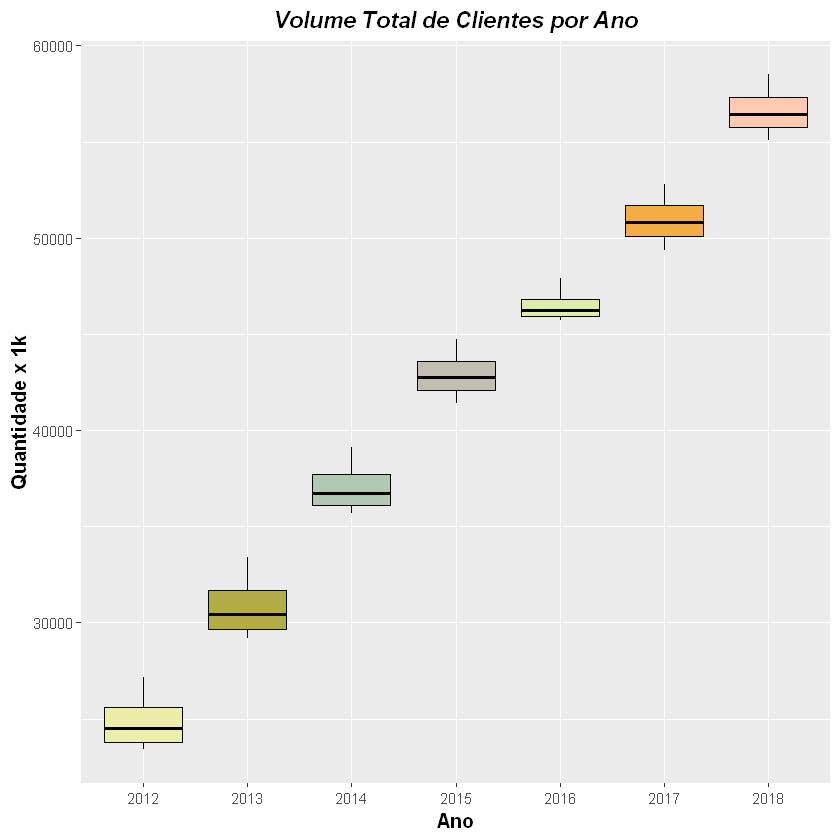

In [21]:
# Definindo as cores para cada ano:
cores = c("#EDEDAA", "#B4AC45", "#AFCAB1", "#C2BFB1", "#DDEDAA", "#F4AC45", "#FFCAB1")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = total_clientes)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "Quantidade x 1k", title = "Volume Total de Clientes por Ano") +
        
        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_total_clientes.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


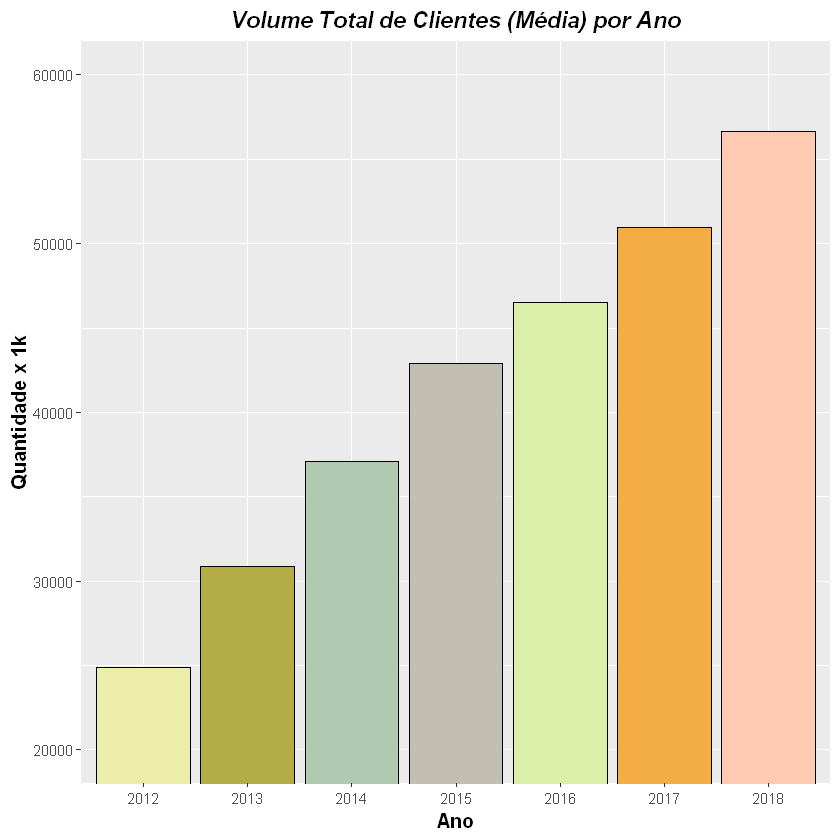

In [22]:
# Barplot:
p1 <- ggplot(media_vol_tot_cli, aes(x = Ano, y = Media_Total_Clientes)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(20000, 60000)) +
            ggtitle("Volume Total de Clientes (Média) por Ano") + xlab("Ano") + ylab("Quantidade x 1k") + 
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_total_clientes.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **o *volume total de clientes (em média, por ano)* aumentou significativamente em todos os anos**;


* O gráfico acima (***Barplot***) apresenta a **`média`** do **`Volume Total de Clientes`** (acumulada) por **`Ano`**.

### `2.7-` Considerando todo o período (`2012 a 2018`), o *volume de clientes novos aumentou e/ou diminuiu*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** VMCN1 = VMCN2 = VMCN3 = VMCN4 = VMCN5 = VMCN6 = VMCN7, ou seja, os volumes médios de clientes novos (por ano) não diferem entre cada um dos anos, ou seja, em todo o período. 
>2. **`H1`:** o volume médio de clientes novos (por ano) é diferente em pelo menos um ano dentro do período.

Onde:

>* **`VMCN1`:** volume médio de clientes novos (por ano) para o ano de ***`2012`***;
>* **`VMCN2`:** volume médio de clientes novos (por ano) para o ano de ***`2013`***;
>* **`VMCN3`:** volume médio de clientes novos (por ano) para o ano de ***`2014`***;
>* **`VMCN4`:** volume médio de clientes novos (por ano) para o ano de ***`2015`***;
>* **`VMCN5`:** volume médio de clientes novos (por ano) para o ano de ***`2016`***;
>* **`VMCN6`:** volume médio de clientes novos (por ano) para o ano de ***`2017`***;
>* **`VMCN7`:** volume médio de clientes novos (por ano) para o ano de ***`2018`***.

In [23]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = clientes_novos ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.7f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,870797.4,145132.9,3.006116,0.027901
Residuals,21,1013863.2,48279.2,NA,NA


[1] "valor-p do teste: 0.0279010"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) no volume de clientes novos (variável dependente) por ano.

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [24]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = clientes_novos ~ ano_cat, data = df_data)

$ano_cat
             diff        lwr      upr     p adj
2013-2012  -74.00 -579.07172 431.0717 0.9989198
2014-2012 -197.25 -702.32172 307.8217 0.8579482
2015-2012 -210.00 -715.07172 295.0717 0.8201000
2016-2012 -173.25 -678.32172 331.8217 0.9163863
2017-2012  207.25 -297.82172 712.3217 0.8286297
2018-2012  248.75 -256.32172 753.8217 0.6831679
2014-2013 -123.25 -628.32172 381.8217 0.9831218
2015-2013 -136.00 -641.07172 369.0717 0.9724891
2016-2013  -99.25 -604.32172 405.8217 0.9945490
2017-2013  281.25 -223.82172 786.3217 0.5559388
2018-2013  322.75 -182.32172 827.8217 0.4001732
2015-2014  -12.75 -517.82172 492.3217 1.0000000
2016-2014   24.00 -481.07172 529.0717 0.9999985
2017-2014  404.50 -100.57172 909.5717 0.1748237
2018-2014  446.00  -59.07172 951.0717 0.1068958
2016-2015   36.75 -468.32172 541.8217 0.9999814
2017-2015  417.25  -87.82172 922.3217

**Conclusão:**

De acordo com os resultados do **`teste-HSD`**, todos os pares de anos têm um **valor-p >= 0.05**. Isso significa que **não há diferença estatisticamente significativa** nos volumes de clientes novos (por ano) entre cada um dos anos.

### Vamos agora, verificar se o *volume de clientes novos* aumentou com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** VMCN2 - VMCN1 = 0, ou seja, o volume médio de clientes novos (por ano) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** VMCN2 - VMCN1 > 0, ou seja, o volume médio de clientes novos (por ano) do ano "2" é MAIOR que o volume médio de clientes novos (por ano) do ano "1".

Onde:

>* **`VMCN1`:** volume médio de clientes novos (por ano) para o ano ***`1`***;
>* **`VMCN2`:** volume médio de clientes novos (por ano) para o ano ***`2`***.

In [25]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "clientes_novos", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2017,2014,clientes_novos,greater,0.95,0.01920193
2018,2014,clientes_novos,greater,0.95,0.02388773
2017,2015,clientes_novos,greater,0.95,0.01376473
2018,2015,clientes_novos,greater,0.95,0.02085883
2017,2016,clientes_novos,greater,0.95,0.02701657
2018,2016,clientes_novos,greater,0.95,0.03043097


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,clientes_novos,greater,0.95,0.67028748
2014,2012,clientes_novos,greater,0.95,0.89974346
2015,2012,clientes_novos,greater,0.95,0.94081297
2016,2012,clientes_novos,greater,0.95,0.86117538
2017,2012,clientes_novos,greater,0.95,0.10804495
2018,2012,clientes_novos,greater,0.95,0.10256742
2014,2013,clientes_novos,greater,0.95,0.76169063
2015,2013,clientes_novos,greater,0.95,0.80704440
2016,2013,clientes_novos,greater,0.95,0.71130242
2017,2013,clientes_novos,greater,0.95,0.07694246


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula. Sendo assim:

* Observamos que o **valor-p é maior ou igual a 0.05** na maioria dos testes (15), ou seja, os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal direito`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui um MAIOR volume de clientes novos (em média, por ano) do que o ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**;


* Observamos também que o **valor-p é menor que 0.05** em alguns testes (05), ou seja, para estes testes podemos rejeitar a hipótese nula do `teste-t unicaudal direito` e concluir, por exemplo, que o ano de **2017** possui um MAIOR volume de clientes novos (em média, por ano) do que o volume de clientes novos no ano de **2014**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **o *volume de clientes novos (em média, por ano)* aumentou significativamente a partir de 2017!**

### O quanto que o *volume de clientes novos* aumentou (em média) entre os anos de `2015 e 2018`?

Primeiro, vamos calcular as médias por ano do *volume de clientes novos*:

In [26]:
# Calculando as médias do volume de clientes novos por ano:
media_vol_cli_novos = aggregate(df_data[, "clientes_novos"], list(df_data$ano_cat), mean)
colnames(media_vol_cli_novos) <- c("Ano", "Media_Clientes_Novos")
media_vol_cli_novos

Ano,Media_Clientes_Novos
2012,1403.75
2013,1329.75
2014,1206.50
2015,1193.75
2016,1230.50
2017,1611.00
2018,1652.50


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* no volume de clientes novos (em média, por ano) entre os anos de 2014 e 2018:

In [27]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_vol_cli_novos, Ano == df_volume[i, "ano1"])$Media_Clientes_Novos
    df_volume[i, "media_ano2"] = filter(media_vol_cli_novos, Ano == df_volume[i, "ano2"])$Media_Clientes_Novos
    
    # Calculando o "aumento" do volume médio de clientes novos:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2018,2015,0.02085883,1652.5,1193.75,0.3842932
2018,2014,0.02388773,1652.5,1206.50,0.3696643
2017,2015,0.01376473,1611.0,1193.75,0.3495288
2018,2016,0.03043097,1652.5,1230.50,0.3429500
2017,2014,0.01920193,1611.0,1206.50,0.3352673
2017,2016,0.02701657,1611.0,1230.50,0.3092239


**Conclusão:**

* o ***`volume de clientes novos`*** *aumentou (em média)* **`~38.0%`** em **3 anos**, ou seja, de **`~1.2 milhões`** em **`2015`** para **`~1.65 milhões`** em **`2018`**.

### Vamos agora, verificar se o *volume de clientes novos* diminuiu com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** VMCN2 - VMCN1 = 0, ou seja, o volume médio de clientes novos (por ano) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** VMCN2 - VMCN1 < 0, ou seja, o volume médio de clientes novos (por ano) do ano "2" é MENOR que o volume médio de clientes novos (por ano) do ano "1".

Onde:

>* **`VMCN1`:** volume médio de clientes novos (por ano) para o ano ***`1`***;
>* **`VMCN2`:** volume médio de clientes novos (por ano) para o ano ***`2`***.

In [28]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "clientes_novos", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,clientes_novos,less,0.95,0.32971252
2014,2012,clientes_novos,less,0.95,0.10025654
2015,2012,clientes_novos,less,0.95,0.05918703
2016,2012,clientes_novos,less,0.95,0.13882462
2017,2012,clientes_novos,less,0.95,0.89195505
2018,2012,clientes_novos,less,0.95,0.89743258
2014,2013,clientes_novos,less,0.95,0.23830937
2015,2013,clientes_novos,less,0.95,0.19295560
2016,2013,clientes_novos,less,0.95,0.28869758
2017,2013,clientes_novos,less,0.95,0.92305754


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes, os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui um MENOR volume de clientes novos (em média, por ano) do que o ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **o *volume de clientes novos (em média, por ano)* NÃO diminuiu significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


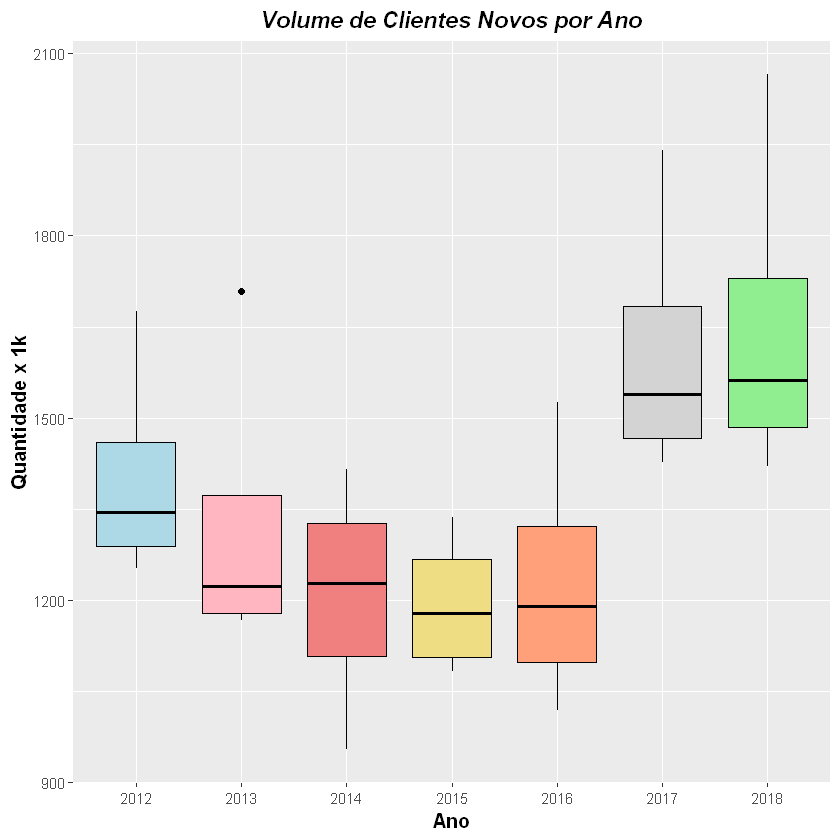

In [29]:
# Definindo as cores para cada ano:
cores = c("lightblue", "lightpink", "lightcoral", "lightgoldenrod", "lightsalmon", "lightgray", "lightgreen")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = clientes_novos)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "Quantidade x 1k", title = "Volume de Clientes Novos por Ano") +
        
        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_clientes_novos.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


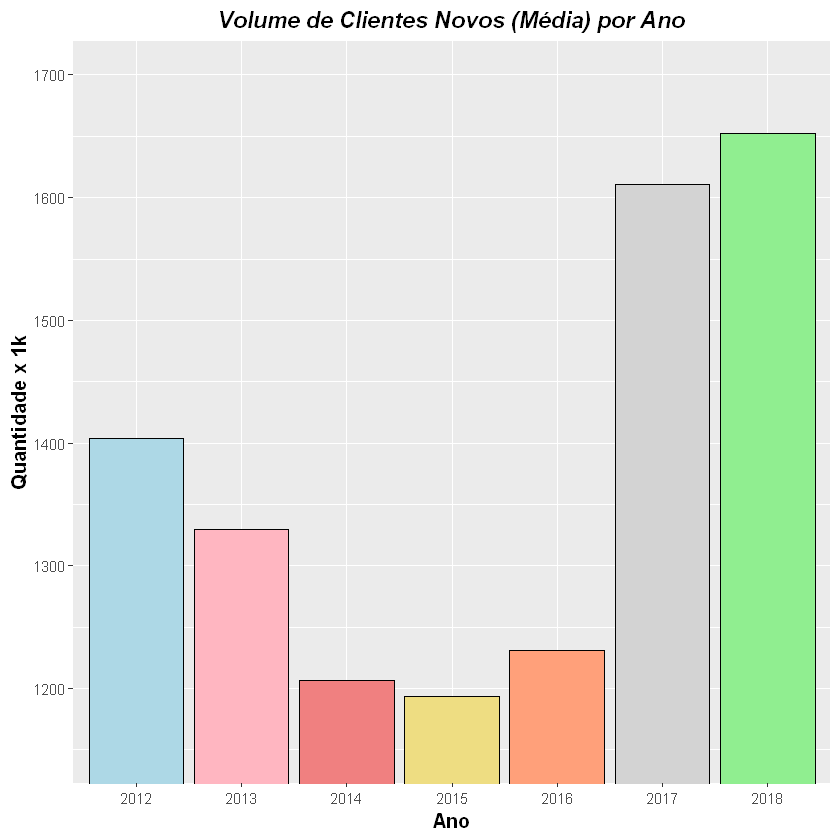

In [30]:
# Barplot:
p1 <- ggplot(media_vol_cli_novos, aes(x = Ano, y = Media_Clientes_Novos)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(1150, 1700)) +
            ggtitle("Volume de Clientes Novos (Média) por Ano") + xlab("Ano") + ylab("Quantidade x 1k") + 
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_clientes_novos.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **o *volume de clientes novos (em média, por ano)* aumentou significativamente a partir de 2016** e também que **o *volume de clientes novos (em média, por ano)* NÃO diminuiu significativamente no período entre 2012 e 2015!**;


* O gráfico acima (***Barplot***) apresenta a **`média`** do **`Volume de Clientes Novos`** (acumulada) por **`Ano`**.

### `2.8-` Considerando todo o período (`2012 a 2018`), a *receita total da empresa aumentou e/ou diminuiu*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** RTM1 = RTM2 = RTM3 = RTM4 = RTM5 = RTM6 = RTM7, ou seja, a receita total média (por trimestre) da empresa não difere entre cada um dos anos, ou seja, em todo o período.
>2. **`H1`:** a receita total média (por trimestre) da empresa é diferente em pelo menos um ano dentro do período.

Onde:

>* **`RTM1`:** receita total média (por trimestre) da empresa para o ano de ***`2012`***;
>* **`RTM2`:** receita total média (por trimestre) da empresa para o ano de ***`2013`***;
>* **`RTM3`:** receita total média (por trimestre) da empresa para o ano de ***`2014`***;
>* **`RTM4`:** receita total média (por trimestre) da empresa para o ano de ***`2015`***;
>* **`RTM5`:** receita total média (por trimestre) da empresa para o ano de ***`2016`***;
>* **`RTM6`:** receita total média (por trimestre) da empresa para o ano de ***`2017`***;
>* **`RTM7`:** receita total média (por trimestre) da empresa para o ano de ***`2018`***;

In [31]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = receita_total ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.20f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,5.656975e+12,942829196093,218.2822,8.403435e-18
Residuals,21,9.070559e+10,4319313754,NA,NA


[1] "valor-p do teste: 0.00000000000000000840"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) na receita total (por trimestre) da empresa (variável dependente).

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [32]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95, )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = receita_total ~ ano_cat, data = df_data)

$ano_cat
               diff         lwr       upr     p adj
2013-2012  141626.8   -9444.001  292697.5 0.0756192
2014-2012  311641.5  160570.749  462712.3 0.0000224
2015-2012  498867.7  347796.999  649938.5 0.0000000
2016-2012  723109.7  572038.999  874180.5 0.0000000
2017-2012  992039.2  840968.499 1143110.0 0.0000000
2018-2012 1365444.8 1214373.999 1516515.5 0.0000000
2014-2013  170014.7   18943.999  321085.5 0.0209491
2015-2013  357241.0  206170.249  508311.8 0.0000029
2016-2013  581483.0  430412.249  732553.8 0.0000000
2017-2013  850412.5  699341.749 1001483.3 0.0000000
2018-2013 1223818.0 1072747.249 1374888.8 0.0000000
2015-2014  187226.2   36155.499  338297.0 0.0092071
2016-2014  411468.2  260397.499  562539.0 0.0000003
2017-2014  680397.8  529326.999  831468.5 0.0000000
2018-2014 1053803.2  902732.499 1204874.0 0.0000000
2016-2015  224242.0   

**Conclusão:**

* De acordo com os resultados do **`teste-HSD`**, quase todos os pares de anos têm um **valor-p < 0.05**. Isso significa que **há diferença estatisticamente significativa** na receita total (por trimestre) da empresa entre cada um dos anos;


* De acordo com os resultados do **`teste-HSD`**, o par de anos **2013-2012** têm um **valor-p >= 0.05**. Isso significa que **não há diferença estatisticamente significativa** na receita total (por trimestre) da empresa entre o ano de 2012 e o ano de 2013.

### Vamos agora, verificar se a *receita total da empresa* aumentou com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** RTM2 - RTM1 = 0, ou seja, a receita total média (por trimestre) da empresa não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** RTM2 - RTM1 > 0, ou seja, a receita total média (por trimestre) da empresa no ano "2" é MAIOR que a receita total média (por trimestre) da empresa no ano "1".

Onde:

>* **`RTM1`:** receita total média (por trimestre) da empresa para o ano ***`1`***;
>* **`RTM2`:** receita total média (por trimestre) da empresa para o ano ***`2`***.

In [33]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "receita_total", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,receita_total,greater,0.95,1.294877e-03
2014,2012,receita_total,greater,0.95,5.786397e-05
2015,2012,receita_total,greater,0.95,5.837002e-06
2016,2012,receita_total,greater,0.95,1.866287e-04
2017,2012,receita_total,greater,0.95,2.570615e-06
2018,2012,receita_total,greater,0.95,1.233986e-06
2014,2013,receita_total,greater,0.95,1.227485e-03
2015,2013,receita_total,greater,0.95,2.598156e-05
2016,2013,receita_total,greater,0.95,2.935242e-04
2017,2013,receita_total,greater,0.95,2.117854e-06


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é menor que 0.05** em todos os testes, podemos rejeitar a hipótese nula do `teste-t unicaudal direito`. Portanto, podemos concluir, por exemplo, que o ano de **2013** possui uma receita total (em média, por trimestre) MAIOR que a do ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **a *receita total (em média, por trimestre) da empresa* aumentou significativamente com o passar dos anos!**

### O quanto que a *receita total da empresa* aumentou (em média, por trimestre) entre os anos de `2012 e 2018`?

Primeiro, vamos calcular as médias por trimestre da *receita total da empresa* em cada um dos anos:

In [34]:
# Calculando as médias da receita total da empresa por ano:
media_rec_tot = aggregate(df_data[, "receita_total"], list(df_data$ano_cat), mean)
colnames(media_rec_tot) <- c("Ano", "Media_Receita_Total")
media_rec_tot

Ano,Media_Receita_Total
2012,546217.0
2013,687843.8
2014,857858.5
2015,1045084.8
2016,1269326.8
2017,1538256.2
2018,1911661.8


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* da receita total da empresa (em média, por trimestre) entre os anos de 2012 e 2018:

In [35]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_rec_tot, Ano == df_volume[i, "ano1"])$Media_Receita_Total
    df_volume[i, "media_ano2"] = filter(media_rec_tot, Ano == df_volume[i, "ano2"])$Media_Receita_Total
    
    # Calculando o "aumento" da receita total média da empresa:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2018,2012,1.233986e-06,1911661.8,546217.0,2.4998210
2017,2012,2.570615e-06,1538256.2,546217.0,1.8161999
2018,2013,7.099076e-07,1911661.8,687843.8,1.7792093
2016,2012,1.866287e-04,1269326.8,546217.0,1.3238507
2017,2013,2.117854e-06,1538256.2,687843.8,1.2363455
2018,2014,7.169685e-07,1911661.8,857858.5,1.2284115
2015,2012,5.837002e-06,1045084.8,546217.0,0.9133142
2016,2013,2.935242e-04,1269326.8,687843.8,0.8453708
2018,2015,1.896637e-06,1911661.8,1045084.8,0.8291930
2017,2014,4.027655e-06,1538256.2,857858.5,0.7931352


**Conclusão:** a *`receita total da empresa`* *aumentou (em média, por trimestre)* **`~250.0%`** em **7 anos**, ou seja, de **`~546 milhões`** em **`2012`** para **`~1.9 bilhões`** em **`2018`**.

### Vamos agora, verificar se a *receita total da empresa* diminuiu com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** RTM2 - RTM1 = 0, ou seja, a receita total média (por trimestre) da empresa não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** RTM2 - RTM1 < 0, ou seja, a receita total média (por trimestre) da empresa no ano "2" é MENOR que a receita total média (por trimestre) da empresa no ano "1".

Onde:

>* **`RTM1`:** receita total média (por trimestre) da empresa para o ano ***`1`***;
>* **`RTM2`:** receita total média (por trimestre) da empresa para o ano ***`2`***.

In [36]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "receita_total", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,receita_total,less,0.95,0.9987051
2014,2012,receita_total,less,0.95,0.9999421
2015,2012,receita_total,less,0.95,0.9999942
2016,2012,receita_total,less,0.95,0.9998134
2017,2012,receita_total,less,0.95,0.9999974
2018,2012,receita_total,less,0.95,0.9999988
2014,2013,receita_total,less,0.95,0.9987725
2015,2013,receita_total,less,0.95,0.9999740
2016,2013,receita_total,less,0.95,0.9997065
2017,2013,receita_total,less,0.95,0.9999979


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes, os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui uma receita total (em média, por trimestre) MENOR em relação ao ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **a *receita total (em média, por trimestre) da empresa* NÃO diminuiu significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


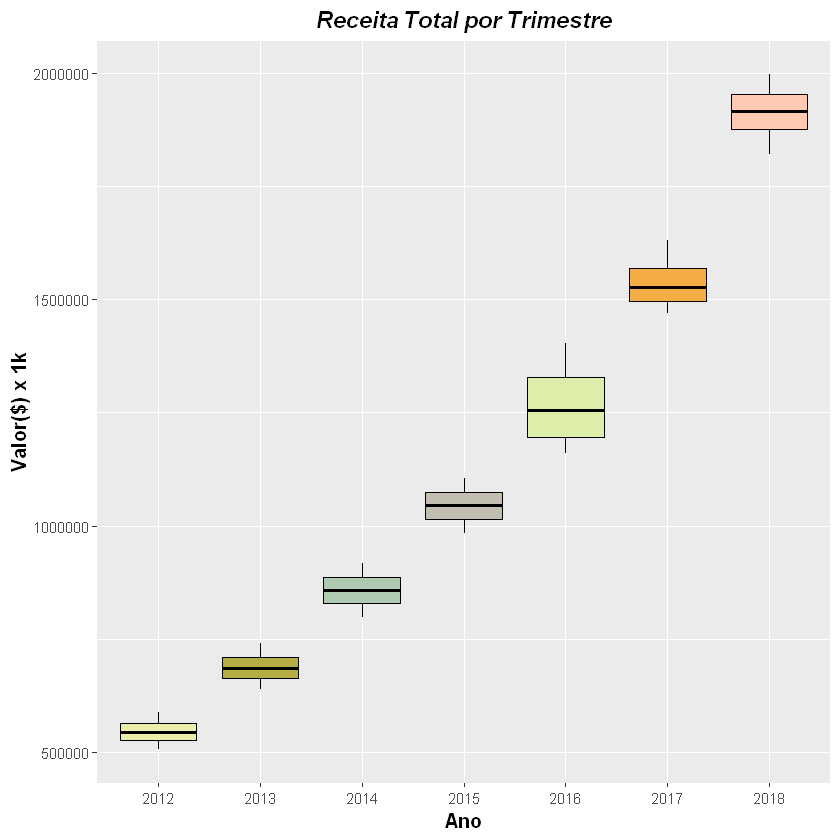

In [37]:
# Definindo as cores para cada ano:
cores = c("#EDEDAA", "#B4AC45", "#AFCAB1", "#C2BFB1", "#DDEDAA", "#F4AC45", "#FFCAB1")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = receita_total)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "Valor($) x 1k", title = "Receita Total por Trimestre") +
        
        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_receita_total.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


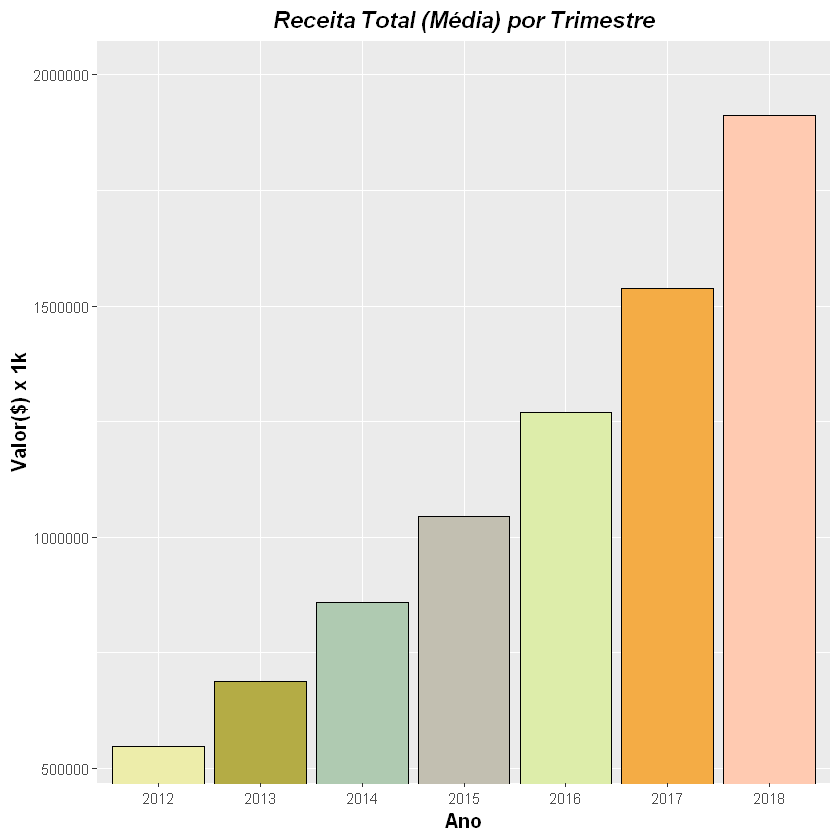

In [38]:
# Barplot:
p1 <- ggplot(media_rec_tot, aes(x = Ano, y = Media_Receita_Total)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(540000.0, 2000000.0)) +
            ggtitle("Receita Total (Média) por Trimestre") + xlab("Ano") + ylab("Valor($) x 1k") + 
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_receita_total.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **a *receita total (em média, por trimestre) da empresa* aumentou significativamente em todos os anos no período entre 2012 e 2018**;


* O gráfico acima (***Barplot***) apresenta a **`média`** da **`Receita Total`** (por **`Trimestre`**) em cada um dos anos.

### `2.9-` Considerando todo o período (`2012 a 2018`), o *custo total da empresa aumentou e/ou diminuiu*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** CTM1 = CTM2 = CTM3 = CTM4 = CTM5 = CTM6 = CTM7, ou seja, o custo total médio (por trimestre) da empresa não difere entre cada um dos anos, ou seja, em todo o período.
>2. **`H1`:** o custo total médio (por trimestre) da empresa é diferente em pelo menos um ano dentro do período.

Onde:

>* **`CTM1`:** custo total médio (por trimestre) da empresa para o ano de ***`2012`***;
>* **`CTM2`:** custo total médio (por trimestre) da empresa para o ano de ***`2013`***;
>* **`CTM3`:** custo total médio (por trimestre) da empresa para o ano de ***`2014`***;
>* **`CTM4`:** custo total médio (por trimestre) da empresa para o ano de ***`2015`***;
>* **`CTM5`:** custo total médio (por trimestre) da empresa para o ano de ***`2016`***;
>* **`CTM6`:** custo total médio (por trimestre) da empresa para o ano de ***`2017`***;
>* **`CTM7`:** custo total médio (por trimestre) da empresa para o ano de ***`2018`***.

In [39]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = custo_total ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.20f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,1.968140e+12,328023289793,99.92647,2.445692e-14
Residuals,21,6.893558e+10,3282646533,NA,NA


[1] "valor-p do teste: 0.00000000000002445692"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) no custo total (por trimestre) da empresa (variável dependente).

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [40]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95, )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = custo_total ~ ano_cat, data = df_data)

$ano_cat
               diff        lwr      upr     p adj
2013-2012  73418.00 -58281.787 205117.8 0.5547233
2014-2012 165069.50  33369.713 296769.3 0.0083077
2015-2012 242475.75 110775.963 374175.5 0.0001084
2016-2012 382491.25 250791.463 514191.0 0.0000001
2017-2012 559917.25 428217.463 691617.0 0.0000000
2018-2012 807202.25 675502.463 938902.0 0.0000000
2014-2013  91651.50 -40048.287 223351.3 0.3065933
2015-2013 169057.75  37357.963 300757.5 0.0066515
2016-2013 309073.25 177373.463 440773.0 0.0000032
2017-2013 486499.25 354799.463 618199.0 0.0000000
2018-2013 733784.25 602084.463 865484.0 0.0000000
2015-2014  77406.25 -54293.537 209106.0 0.4953667
2016-2014 217421.75  85721.963 349121.5 0.0004359
2017-2014 394847.75 263147.963 526547.5 0.0000001
2018-2014 642132.75 510432.963 773832.5 0.0000000
2016-2015 140015.50   8315.713 271715.3 0.0324505
2017-2

**Conclusão:**

* De acordo com os resultados do **`teste-HSD`**, **18** pares de anos têm um **valor-p < 0.05**. Isso significa que **há diferença estatisticamente significativa** no custo total da empresa entre cada um dos anos;


* De acordo com os resultados do **`teste-HSD`**, **3** pares de anos têm um **valor-p >= 0.05**. Isso significa que **não há diferença estatisticamente significativa** no custo total (por trimestre) da empresa entre cada um dos anos.

### Vamos agora, verificar se o *custo total da empresa* aumentou com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** CTM2 - CTM1 = 0, ou seja, o custo total médio (por trimestre) da empresa não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** CTM2 - CTM1 > 0, ou seja, o custo total médio (por trimestre) da empresa no ano "2" é MAIOR que o custo total médio (por trimestre) da empresa no ano "1".

Onde:

>* **`CTM1`:** custo total médio (por trimestre) da empresa para o ano ***`1`***;
>* **`CTM2`:** custo total médio (por trimestre) da empresa para o ano ***`2`***.

In [41]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "custo_total", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,custo_total,greater,0.95,2.273457e-03
2014,2012,custo_total,greater,0.95,6.743422e-05
2015,2012,custo_total,greater,0.95,7.536693e-06
2016,2012,custo_total,greater,0.95,1.574694e-04
2017,2012,custo_total,greater,0.95,4.270156e-04
2018,2012,custo_total,greater,0.95,1.701478e-04
2014,2013,custo_total,greater,0.95,1.379444e-03
2015,2013,custo_total,greater,0.95,4.709296e-05
2016,2013,custo_total,greater,0.95,1.712602e-04
2017,2013,custo_total,greater,0.95,5.000312e-04


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é menor que 0.05** em todos os testes, podemos rejeitar a hipótese nula do `teste-t unicaudal direito`. Portanto, podemos concluir, por exemplo, que o ano de **2013** possui um custo total (em média, por trimestre) MAIOR que o do ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **o *custo total (em média, por trimestre) da empresa* aumentou significativamente com o passar dos anos!**

### O quanto que o *custo total da empresa* aumentou (em média, por trimestre) entre os anos de `2012 e 2018`?

Primeiro, vamos calcular as médias por trimestre do *custo total da empresa* em cada um dos anos:

In [42]:
# Calculando as médias do custo total (por trimestre) da empresa por ano:
media_custo_tot = aggregate(df_data[, "custo_total"], list(df_data$ano_cat), mean)
colnames(media_custo_tot) <- c("Ano", "Media_Custo_Total")
media_custo_tot

Ano,Media_Custo_Total
2012,458734.0
2013,532152.0
2014,623803.5
2015,701209.8
2016,841225.2
2017,1018651.2
2018,1265936.2


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* do custo total (em média, por trimestre) da empresa entre os anos de 2012 e 2018:

In [43]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_custo_tot, Ano == df_volume[i, "ano1"])$Media_Custo_Total
    df_volume[i, "media_ano2"] = filter(media_custo_tot, Ano == df_volume[i, "ano2"])$Media_Custo_Total
    
    # Calculando o "aumento" do custo total médio da empresa:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2018,2012,1.701478e-04,1265936.2,458734.0,1.7596303
2018,2013,1.654546e-04,1265936.2,532152.0,1.3788997
2017,2012,4.270156e-04,1018651.2,458734.0,1.2205706
2018,2014,2.429520e-04,1265936.2,623803.5,1.0293831
2017,2013,5.000312e-04,1018651.2,532152.0,0.9142111
2016,2012,1.574694e-04,841225.2,458734.0,0.8337975
2018,2015,3.901115e-04,1265936.2,701209.8,0.8053603
2017,2014,9.595908e-04,1018651.2,623803.5,0.6329682
2016,2013,1.712602e-04,841225.2,532152.0,0.5807988
2015,2012,7.536693e-06,701209.8,458734.0,0.5285759


**Conclusão:** o *`custo total da empresa`* *aumentou (em média, por trimestre)* **`~176.0%`** em **7 anos**, ou seja, de **`~460 milhões`** em **`2012`** para **`~1.3 bilhões`** em **`2018`**.

### Vamos agora, verificar se o *custo total da empresa* diminuiu com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** CTM2 - CTM1 = 0, ou seja, o custo total médio (por trimestre) da empresa não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** CTM2 - CTM1 < 0, ou seja, o custo total médio (por trimestre) da empresa no ano "2" é MENOR que o custo total médio (por trimestre) da empresa no ano "1".

Onde:

>* **`CTM1`:** custo total médio (por trimestre) da empresa para o ano ***`1`***;
>* **`CTM2`:** custo total médio (por trimestre) da empresa para o ano ***`2`***.

In [44]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "custo_total", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,custo_total,less,0.95,0.9977265
2014,2012,custo_total,less,0.95,0.9999326
2015,2012,custo_total,less,0.95,0.9999925
2016,2012,custo_total,less,0.95,0.9998425
2017,2012,custo_total,less,0.95,0.9995730
2018,2012,custo_total,less,0.95,0.9998299
2014,2013,custo_total,less,0.95,0.9986206
2015,2013,custo_total,less,0.95,0.9999529
2016,2013,custo_total,less,0.95,0.9998287
2017,2013,custo_total,less,0.95,0.9995000


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes, os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui um custo total (em média, por trimestre) MENOR em relação ao ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **o *custo total (em média, por trimestre) da empresa* NÃO diminuiu significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


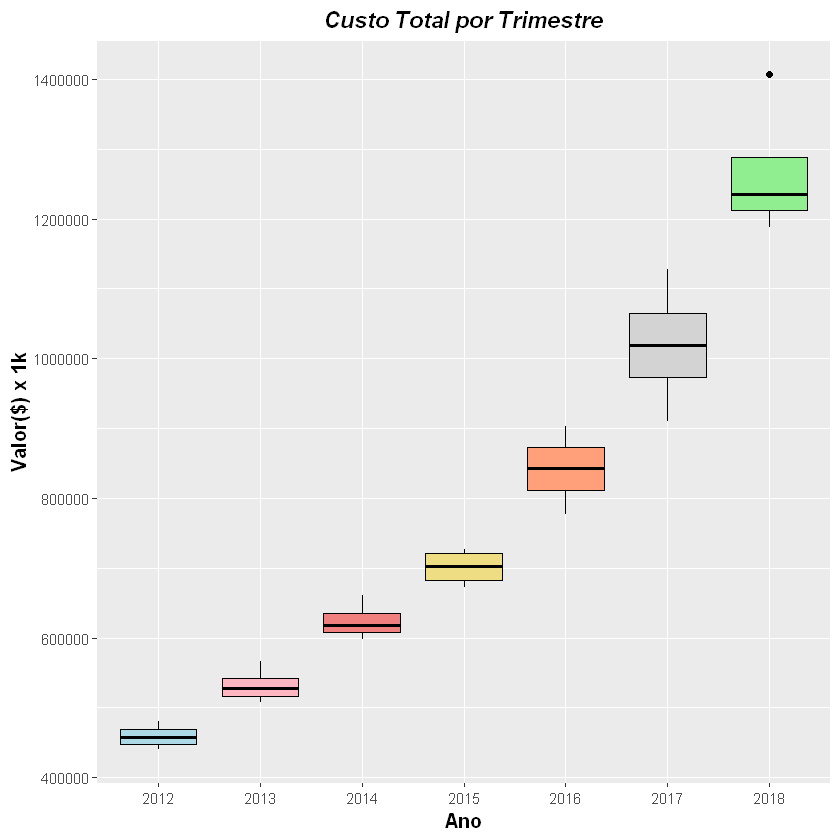

In [45]:
# Definindo as cores para cada ano:
cores = c("lightblue", "lightpink", "lightcoral", "lightgoldenrod", "lightsalmon", "lightgray", "lightgreen")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = custo_total)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "Valor($) x 1k", title = "Custo Total por Trimestre") +
        
        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_custo_total.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


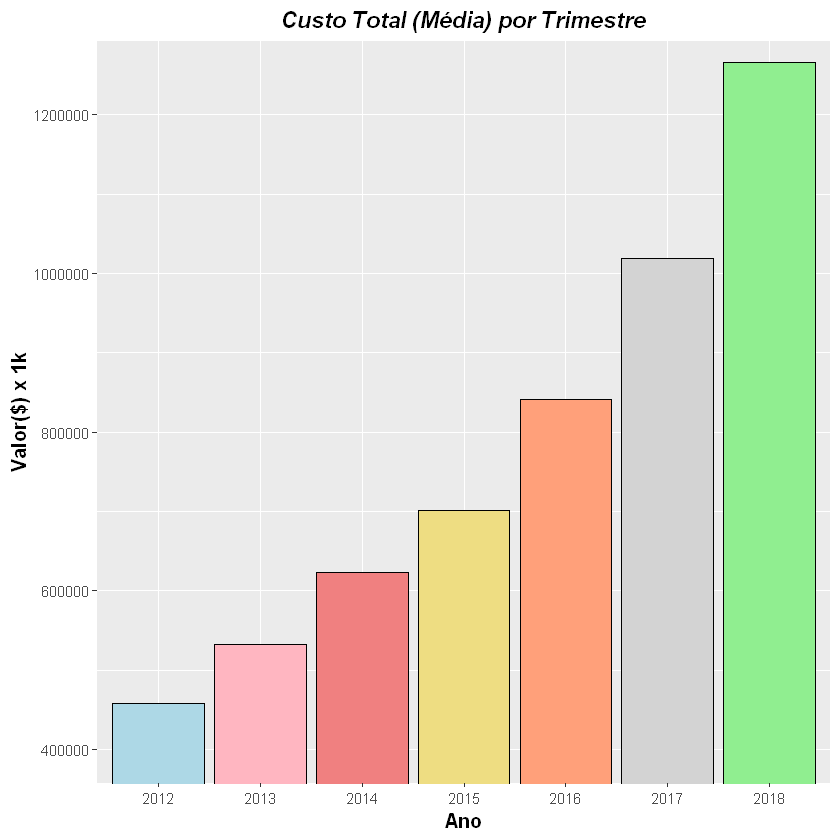

In [46]:
# Barplot:
p1 <- ggplot(media_custo_tot, aes(x = Ano, y = Media_Custo_Total)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(400000.0, 1250000.0)) +
            ggtitle("Custo Total (Média) por Trimestre") + xlab("Ano") + ylab("Valor($) x 1k") + 
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_custo_total.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **o *custo total (em média, por trimestre) da empresa* aumentou significativamente em todos os anos no período entre 2012 e 2018**;


* O gráfico acima (***Barplot***) apresenta a **`média`** do **`Custo Total`** (por **`Trimestre`**) em cada um dos anos.

### `2.10-` Considerando todo o período (`2012 a 2018`), os *custos de marketing aumentaram e/ou diminuíram*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** CMM1 = CMM2 = CMM3 = CMM4 = CMM5 = CMM6 = CMM7, ou seja, o custo médio de marketing (por trimestre) não difere entre cada um dos anos, ou seja, em todo o período.
>2. **`H1`:** o custo médio de marketing (por trimestre) é diferente em pelo menos um ano dentro do período.

Onde:

>* **`CMM1`:** custo médio de marketing (por trimestre) para o ano de ***`2012`***;
>* **`CMM2`:** custo médio de marketing (por trimestre) para o ano de ***`2013`***;
>* **`CMM3`:** custo médio de marketing (por trimestre) para o ano de ***`2014`***;
>* **`CMM4`:** custo médio de marketing (por trimestre) para o ano de ***`2015`***;
>* **`CMM5`:** custo médio de marketing (por trimestre) para o ano de ***`2016`***;
>* **`CMM6`:** custo médio de marketing (por trimestre) para o ano de ***`2017`***;
>* **`CMM7`:** custo médio de marketing (por trimestre) para o ano de ***`2018`***;

In [47]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = custo_marketing ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.20f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,115543417066,19257236178,34.24793,8.612104e-10
Residuals,21,11808068780,562288990,NA,NA


[1] "valor-p do teste: 0.00000000086121038940"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) no custo de marketing (variável dependente) por trimestre.

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [48]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95, )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = custo_marketing ~ ano_cat, data = df_data)

$ano_cat
               diff        lwr       upr     p adj
2013-2012  -2710.00 -57217.065  51797.07 0.9999981
2014-2012   4345.25 -50161.815  58852.32 0.9999681
2015-2012  10393.50 -44113.565  64900.57 0.9953641
2016-2012  34214.00 -20293.065  88721.07 0.4204308
2017-2012  81918.50  27411.435 136425.57 0.0013072
2018-2012 187319.75 132812.685 241826.82 0.0000000
2014-2013   7055.25 -47451.815  61562.32 0.9994655
2015-2013  13103.50 -41403.565  67610.57 0.9843539
2016-2013  36924.00 -17583.065  91431.07 0.3354028
2017-2013  84628.50  30121.435 139135.57 0.0009031
2018-2013 190029.75 135522.685 244536.82 0.0000000
2015-2014   6048.25 -48458.815  60555.32 0.9997797
2016-2014  29868.75 -24638.315  84375.82 0.5735585
2017-2014  77573.25  23066.185 132080.32 0.0023661
2018-2014 182974.50 128467.435 237481.57 0.0000000
2016-2015  23820.50 -30686.565  7832

**Conclusão:**

* De acordo com os resultados do **`teste-HSD`**, **dez** pares de anos têm um **valor-p < 0.05**. Isso significa que **há diferença estatisticamente significativa** no custo de marketing (por trimestre) entre cada um dos anos;


* De acordo com os resultados do **`teste-HSD`**, **onze** pares de anos têm um **valor-p >= 0.05**. Isso significa que **não há diferença estatisticamente significativa** no custo de marketing (por trimestre) entre cada um dos anos.

### Vamos agora, verificar se os *custos de marketing* aumentaram com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** CMM2 - CMM1 = 0, ou seja, o custo médio de marketing (por trimestre) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** CMM2 - CMM1 > 0, ou seja, o custo médio de marketing (por trimestre) no ano "2" é MAIOR que o custo médio de marketing (por trimestre) no ano "1".

Onde:

>* **`CMM1`:** custo médio de marketing (por trimestre) para o ano ***`1`***;
>* **`CMM2`:** custo médio de marketing (por trimestre) para o ano ***`2`***.

In [49]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "custo_marketing", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2016,2012,custo_marketing,greater,0.95,0.0046586720
2017,2012,custo_marketing,greater,0.95,0.0126188670
2018,2012,custo_marketing,greater,0.95,0.0011833804
2015,2013,custo_marketing,greater,0.95,0.0140092840
2016,2013,custo_marketing,greater,0.95,0.0052182077
2017,2013,custo_marketing,greater,0.95,0.0123908866
2018,2013,custo_marketing,greater,0.95,0.0013553105
2016,2014,custo_marketing,greater,0.95,0.0099609836
2017,2014,custo_marketing,greater,0.95,0.0134367455
2018,2014,custo_marketing,greater,0.95,0.0009674119


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,custo_marketing,greater,0.95,0.70671107
2014,2012,custo_marketing,greater,0.95,0.29359912
2015,2012,custo_marketing,greater,0.95,0.05475649
2014,2013,custo_marketing,greater,0.95,0.17529588
2015,2014,custo_marketing,greater,0.95,0.22183273


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é menor que 0.05** na maioria dos testes (16), podemos rejeitar a hipótese nula do `teste-t unicaudal direito`. Portanto, podemos concluir, por exemplo, que o ano de **2016** possui um custo de marketing (em média, por trimestre) MAIOR que o do ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **o *custo de marketing (em média, por trimestre)* aumentou significativamente a partir de 2015!**

### O quanto que os *custos de marketing* aumentaram (em média, por trimestre) entre os anos de `2012 e 2018`?

Primeiro, vamos calcular as médias por trimestre do *custo de marketing* em cada um dos anos:

In [50]:
# Calculando as médias do custo de marketing por ano:
media_custo_mkt = aggregate(df_data[, "custo_marketing"], list(df_data$ano_cat), mean)
colnames(media_custo_mkt) <- c("Ano", "Media_Custo_Marketing")
media_custo_mkt

Ano,Media_Custo_Marketing
2012,69018.00
2013,66308.00
2014,73363.25
2015,79411.50
2016,103232.00
2017,150936.50
2018,256337.75


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* do custo de marketing (em média, por trimestre) entre os anos de 2012 e 2018:

In [51]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_custo_mkt, Ano == df_volume[i, "ano1"])$Media_Custo_Marketing
    df_volume[i, "media_ano2"] = filter(media_custo_mkt, Ano == df_volume[i, "ano2"])$Media_Custo_Marketing
    
    # Calculando o "aumento" do custo médio de marketing:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2018,2013,0.0013553105,256337.8,66308.00,2.8658646
2018,2012,0.0011833804,256337.8,69018.00,2.7140710
2018,2014,0.0009674119,256337.8,73363.25,2.4940893
2018,2015,0.0014853545,256337.8,79411.50,2.2279676
2018,2016,0.0015929715,256337.8,103232.00,1.4831230
2017,2013,0.0123908866,150936.5,66308.00,1.2762940
2017,2012,0.0126188670,150936.5,69018.00,1.1869150
2017,2014,0.0134367455,150936.5,73363.25,1.0573857
2017,2015,0.0185545955,150936.5,79411.50,0.9006882
2018,2017,0.0057344201,256337.8,150936.50,0.6983152


**Conclusão:** o *`custo de marketing`* *aumentou (em média, por trimestre)* **`~271.4%`** em **7 anos**, ou seja, de **`~69 milhões`** em **`2012`** para **`~256 milhões`** em **`2018`**.

### Vamos agora, verificar se os *custos de marketing* diminuíram com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** CMM2 - CMM1 = 0, ou seja, o custo médio de marketing (por trimestre) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** CMM2 - CMM1 < 0, ou seja, o custo médio de marketing (por trimestre) no ano "2" é MENOR que o custo médio de marketing (por trimestre) no ano "1".

Onde:

>* **`CMM1`:** custo médio de marketing (por trimestre) para o ano ***`1`***;
>* **`CMM2`:** custo médio de marketing (por trimestre) para o ano ***`2`***.

In [52]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "custo_marketing", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,custo_marketing,less,0.95,0.2932889
2014,2012,custo_marketing,less,0.95,0.7064009
2015,2012,custo_marketing,less,0.95,0.9452435
2016,2012,custo_marketing,less,0.95,0.9953413
2017,2012,custo_marketing,less,0.95,0.9873811
2018,2012,custo_marketing,less,0.95,0.9988166
2014,2013,custo_marketing,less,0.95,0.8247041
2015,2013,custo_marketing,less,0.95,0.9859907
2016,2013,custo_marketing,less,0.95,0.9947818
2017,2013,custo_marketing,less,0.95,0.9876091


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes, os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui um custo de marketing (em média, por trimestre) MENOR em relação ao ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **os *custos de marketing (em média, por trimestre)* NÃO diminuíram significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


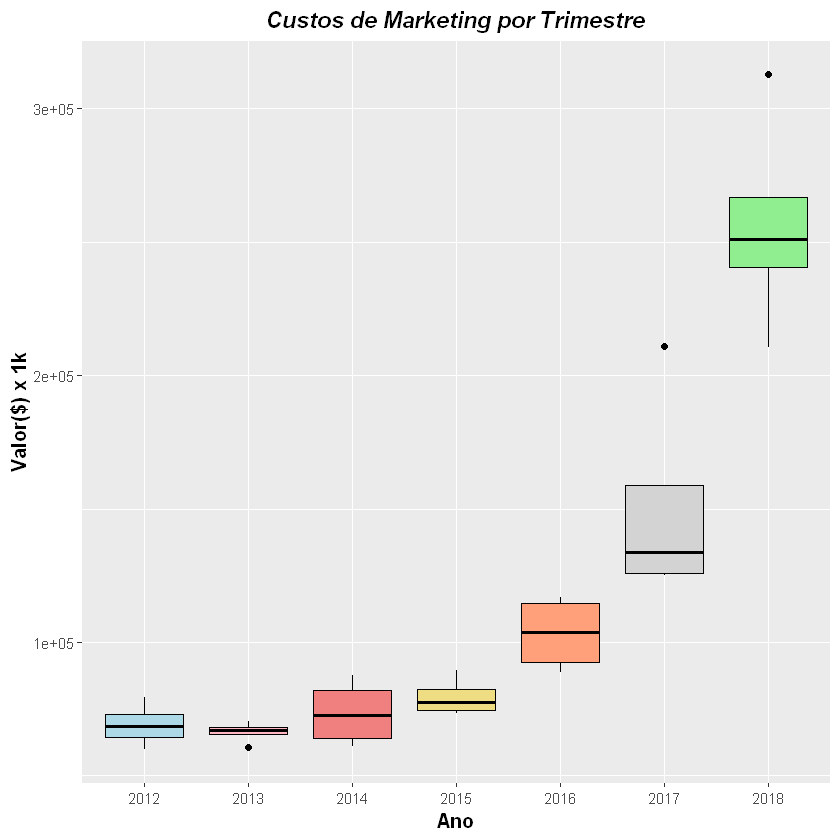

In [53]:
# Definindo as cores para cada ano:
cores = c("lightblue", "lightpink", "lightcoral", "lightgoldenrod", "lightsalmon", "lightgray", "lightgreen")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = custo_marketing)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "Valor($) x 1k", title = "Custos de Marketing por Trimestre") +
        
        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_custo_marketing.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


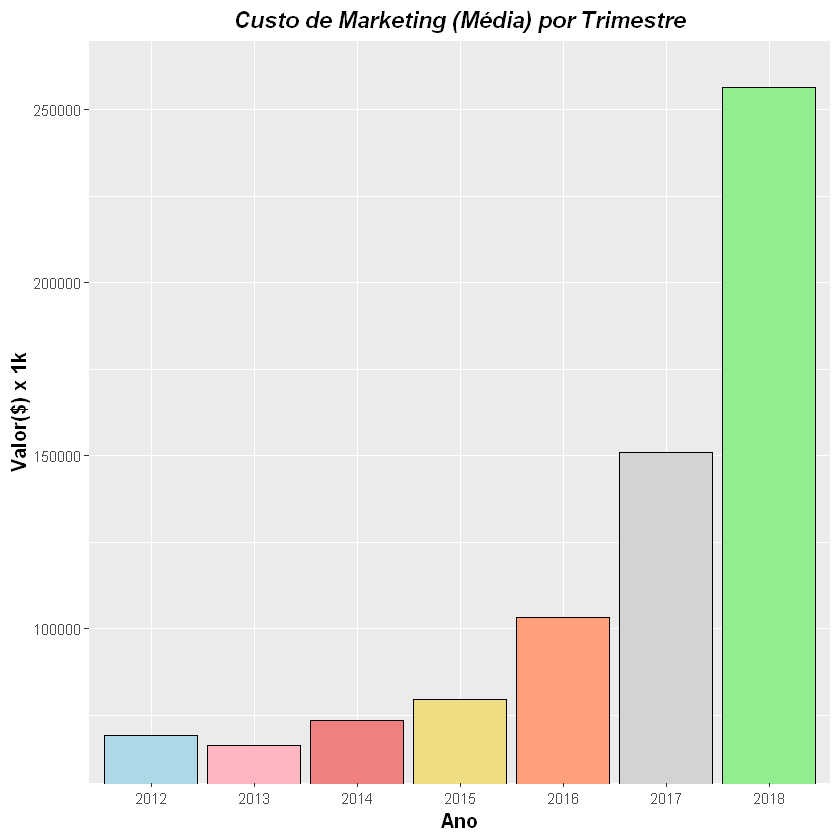

In [54]:
# Barplot:
p1 <- ggplot(media_custo_mkt, aes(x = Ano, y = Media_Custo_Marketing)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(65000.0, 260000.0)) +
            ggtitle("Custo de Marketing (Média) por Trimestre") + xlab("Ano") + ylab("Valor($) x 1k") + 
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_custo_marketing.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **os *custos de marketing (em média, por trimestre)* aumentaram significativamente no período entre 2015 e 2018**;


* O gráfico acima (***Barplot***) apresenta a **`média`** do **`Custo de Marketing`** (por **`Trimestre`**) em cada um dos anos.

### `2.11-` Considerando todo o período (`2012 a 2018`), as *margens de contribuição aumentaram e/ou diminuíram*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** MMC1 = MMC2 = MMC3 = MMC4 = MMC5 = MMC6 = MMC7, ou seja, a margem média de contribuição (por trimestre) não difere entre cada um dos anos, ou seja, em todo o período.
>2. **`H1`:** a margem média de contribuição (por trimestre) é diferente em pelo menos um ano dentro do período.

Onde:

>* **`MMC1`:** margem média de contribuição (por trimestre) para o ano de ***`2012`***;
>* **`MMC2`:** margem média de contribuição (por trimestre) para o ano de ***`2013`***;
>* **`MMC3`:** margem média de contribuição (por trimestre) para o ano de ***`2014`***;
>* **`MMC4`:** margem média de contribuição (por trimestre) para o ano de ***`2015`***;
>* **`MMC5`:** margem média de contribuição (por trimestre) para o ano de ***`2016`***;
>* **`MMC6`:** margem média de contribuição (por trimestre) para o ano de ***`2017`***;
>* **`MMC7`:** margem média de contribuição (por trimestre) para o ano de ***`2018`***;

In [55]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = margem_de_contribuicao ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.20f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,0.1194739,0.019912310,45.60568,5.675141e-11
Residuals,21,0.0091690,0.000436619,NA,NA


[1] "valor-p do teste: 0.00000000005675140907"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) na margem de contribuição (variável dependente) por trimestre.

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [56]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95, )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = margem_de_contribuicao ~ ano_cat, data = df_data)

$ano_cat
              diff          lwr       upr     p adj
2013-2012  0.06650  0.018468699 0.1145313 0.0031541
2014-2012  0.11325  0.065218699 0.1612813 0.0000030
2015-2012  0.16975  0.121718699 0.2177813 0.0000000
2016-2012  0.17725  0.129218699 0.2252813 0.0000000
2017-2012  0.17975  0.131718699 0.2277813 0.0000000
2018-2012  0.17950  0.131468699 0.2275313 0.0000000
2014-2013  0.04675 -0.001281301 0.0947813 0.0597685
2015-2013  0.10325  0.055218699 0.1512813 0.0000123
2016-2013  0.11075  0.062718699 0.1587813 0.0000043
2017-2013  0.11325  0.065218699 0.1612813 0.0000030
2018-2013  0.11300  0.064968699 0.1610313 0.0000031
2015-2014  0.05650  0.008468699 0.1045313 0.0145490
2016-2014  0.06400  0.015968699 0.1120313 0.0046397
2017-2014  0.06650  0.018468699 0.1145313 0.0031541
2018-2014  0.06625  0.018218699 0.1142813 0.0032784
2016-2015  0.

**Conclusão:**

* De acordo com os resultados do **`teste-HSD`**, **quatorze** pares de anos têm um **valor-p < 0.05**. Isso significa que **há diferença estatisticamente significativa** na margem de contribuição (por trimestre) entre cada um dos anos;


* De acordo com os resultados do **`teste-HSD`**, **sete** pares de anos têm um **valor-p >= 0.05**. Isso significa que **não há diferença estatisticamente significativa** na margem de contribuição (por trimestre) entre cada um dos anos.

### Vamos agora, verificar se as *margens de contribuição* aumentaram com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** MMC2 - MMC1 = 0, ou seja, a margem média de contribuição (por trimestre) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** MMC2 - MMC1 > 0, ou seja, a margem média de contribuição (por trimestre) no ano "2" é MAIOR que a margem média de contribuição (por trimestre) no ano "1".

Onde:

>* **`MMC1`:** margem média de contribuição (por trimestre) para o ano ***`1`***;
>* **`MMC2`:** margem média de contribuição (por trimestre) para o ano ***`2`***.

In [57]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "margem_de_contribuicao", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,margem_de_contribuicao,greater,0.95,1.922551e-03
2014,2012,margem_de_contribuicao,greater,0.95,1.538884e-04
2015,2012,margem_de_contribuicao,greater,0.95,4.603173e-05
2016,2012,margem_de_contribuicao,greater,0.95,1.390625e-05
2017,2012,margem_de_contribuicao,greater,0.95,6.930096e-05
2018,2012,margem_de_contribuicao,greater,0.95,4.288504e-05
2014,2013,margem_de_contribuicao,greater,0.95,1.886345e-03
2015,2013,margem_de_contribuicao,greater,0.95,1.764087e-05
2016,2013,margem_de_contribuicao,greater,0.95,2.483884e-05
2017,2013,margem_de_contribuicao,greater,0.95,1.114493e-03


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2016,2015,margem_de_contribuicao,greater,0.95,0.2359124
2017,2015,margem_de_contribuicao,greater,0.95,0.2885216
2018,2015,margem_de_contribuicao,greater,0.95,0.2798031
2017,2016,margem_de_contribuicao,greater,0.95,0.4458898
2018,2016,margem_de_contribuicao,greater,0.95,0.4480565
2018,2017,margem_de_contribuicao,greater,0.95,0.5045509


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é menor que 0.05** na maioria dos testes (15), podemos rejeitar a hipótese nula do `teste-t unicaudal direito`. Portanto, podemos concluir, por exemplo, que o ano de **2013** possui uma margem de contribuição (em média, por trimestre) MAIOR que a do ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **a *margem de contribuição (em média, por trimestre)* aumentou significativamente até 2015!**

### O quanto que as *margens de contribuição* aumentaram (em média, por trimestre) entre os anos de `2012 e 2018`?

Primeiro, vamos calcular as médias (por trimestre) da *margem de contribuição* em cada um dos anos:

In [58]:
# Calculando as médias do custo de marketing por ano:
media_margem_ctb = aggregate(df_data[, "margem_de_contribuicao"], list(df_data$ano_cat), mean)
colnames(media_margem_ctb) <- c("Ano", "Media_Margem_Contribuicao")
media_margem_ctb

Ano,Media_Margem_Contribuicao
2012,0.15900
2013,0.22550
2014,0.27225
2015,0.32875
2016,0.33625
2017,0.33875
2018,0.33850


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* da margem de contribuicao (em média, por trimestre) entre os anos de 2012 e 2018:

In [59]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_margem_ctb, Ano == df_volume[i, "ano1"])$Media_Margem_Contribuicao
    df_volume[i, "media_ano2"] = filter(media_margem_ctb, Ano == df_volume[i, "ano2"])$Media_Margem_Contribuicao
    
    # Calculando o "aumento" da margem médio de contribuição:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2017,2012,6.930096e-05,0.33875,0.15900,1.1305031
2018,2012,4.288504e-05,0.33850,0.15900,1.1289308
2016,2012,1.390625e-05,0.33625,0.15900,1.1147799
2015,2012,4.603173e-05,0.32875,0.15900,1.0676101
2014,2012,1.538884e-04,0.27225,0.15900,0.7122642
2017,2013,1.114493e-03,0.33875,0.22550,0.5022173
2018,2013,7.393800e-04,0.33850,0.22550,0.5011086
2016,2013,2.483884e-05,0.33625,0.22550,0.4911308
2015,2013,1.764087e-05,0.32875,0.22550,0.4578714
2013,2012,1.922551e-03,0.22550,0.15900,0.4182390


**Conclusão:** o *`margem de contribuição`* *aumentou (em média, por trimestre)* **`~113.0%`** em **7 anos**, ou seja, de **`~16%`** em **`2012`** para **`~34%`** em **`2018`**.

### Vamos agora, verificar se as *margens de contribuição* diminuíram com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** MMC2 - MMC1 = 0, ou seja, a margem média de contribuição (por trimestre) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** MMC2 - MMC1 < 0, ou seja, a margem média de contribuição (por trimestre) no ano "2" é MENOR que a margem média de contribuição (por trimestre) no ano "1".

Onde:

>* **`MMC1`:** margem média de contribuição (por trimestre) para o ano ***`1`***;
>* **`MMC2`:** margem média de contribuição (por trimestre) para o ano ***`2`***.

In [60]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "margem_de_contribuicao", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,margem_de_contribuicao,less,0.95,0.9980774
2014,2012,margem_de_contribuicao,less,0.95,0.9998461
2015,2012,margem_de_contribuicao,less,0.95,0.9999540
2016,2012,margem_de_contribuicao,less,0.95,0.9999861
2017,2012,margem_de_contribuicao,less,0.95,0.9999307
2018,2012,margem_de_contribuicao,less,0.95,0.9999571
2014,2013,margem_de_contribuicao,less,0.95,0.9981137
2015,2013,margem_de_contribuicao,less,0.95,0.9999824
2016,2013,margem_de_contribuicao,less,0.95,0.9999752
2017,2013,margem_de_contribuicao,less,0.95,0.9988855


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes, os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui uma margem de contribuição (em média, por trimestre) MENOR em relação ao ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **as *margens de contribuição (em média, por trimestre)* NÃO diminuíram significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


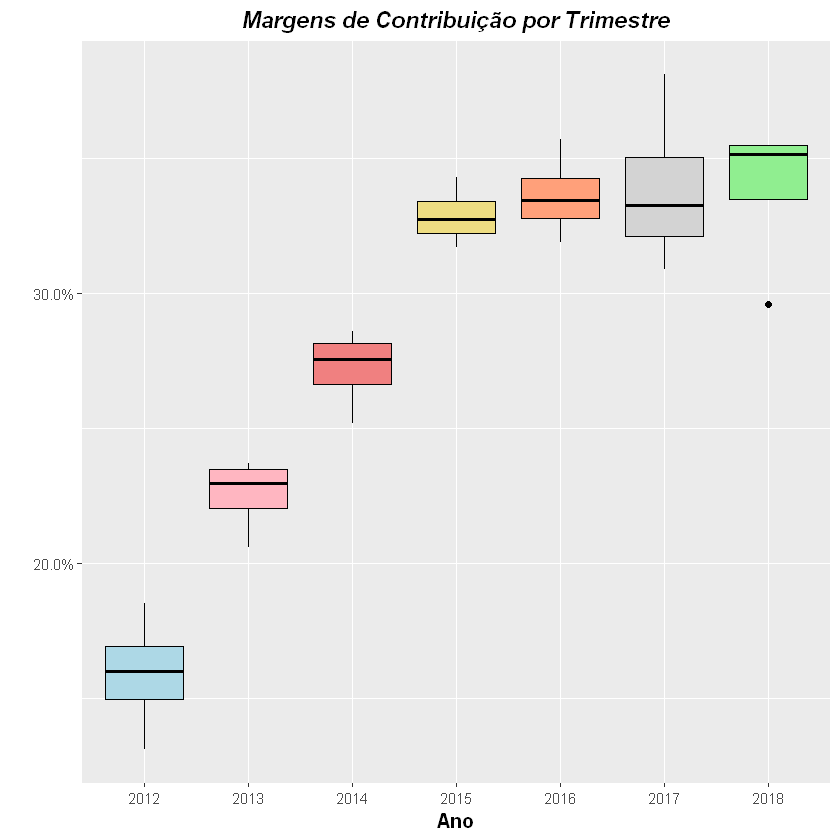

In [61]:
# Definindo as cores para cada ano:
cores = c("lightblue", "lightpink", "lightcoral", "lightgoldenrod", "lightsalmon", "lightgray", "lightgreen")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = margem_de_contribuicao)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "", title = "Margens de Contribuição por Trimestre") +
        
        # Agora, vamos formatar os valores em "%":
        scale_y_continuous(labels = scales::percent) +

        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_margem_contribuicao.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


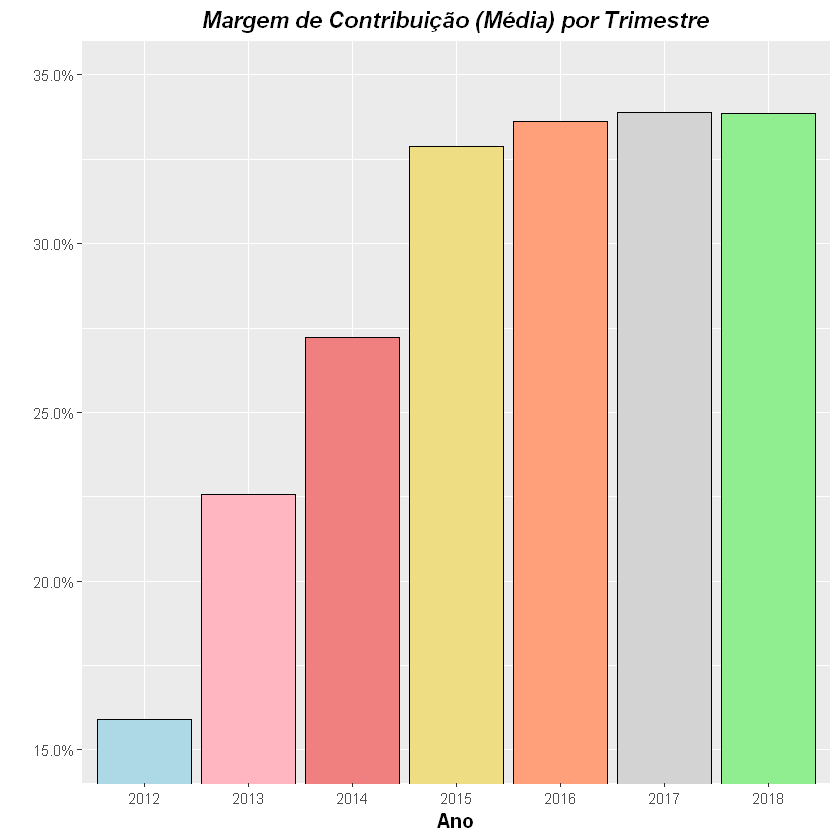

In [62]:
# Barplot:
p1 <- ggplot(media_margem_ctb, aes(x = Ano, y = Media_Margem_Contribuicao)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(0.15, 0.35)) +
            ggtitle("Margem de Contribuição (Média) por Trimestre") + xlab("Ano") + ylab("") +
            scale_y_continuous(labels = scales::percent) +
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_margem_contribuicao.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **as *margens de contribuição (em média, por trimestre)* aumentaram significativamente no período entre 2012 e 2015**;


* O gráfico acima (***Barplot***) apresenta a **`média`** da **`Margem de Contribuição`** (por **`Trimestre`**) em cada um dos anos.

### `2.12-` Considerando todo o período (`2012 a 2018`), os *rendimentos por cliente aumentaram e/ou diminuíram*?

Para fazermos esta análise, vamos realizar um teste de **Análise de Variância (`ANOVA`)** para concluir se devemos rejeitar ou não a hipótese nula.

Então, para realizarmos o *teste de hipóteses* definimos as duas hipóteses:

>1. **`H0`:** RMPC1 = RMPC2 = RMPC3 = RMPC4 = RMPC5 = RMPC6 = RMPC7, ou seja, o rendimento médio por cliente (por trimestre) não difere entre cada um dos anos, ou seja, em todo o período.
>2. **`H1`:** o rendimento médio por cliente (por trimestre) é diferente em pelo menos um ano dentro do período.

Onde:

>* **`RMPC1`:** rendimento médio por cliente (por trimestre) para o ano de ***`2012`***;
>* **`RMPC2`:** rendimento médio por cliente (por trimestre) para o ano de ***`2013`***;
>* **`RMPC3`:** rendimento médio por cliente (por trimestre) para o ano de ***`2014`***;
>* **`RMPC4`:** rendimento médio por cliente (por trimestre) para o ano de ***`2015`***;
>* **`RMPC5`:** rendimento médio por cliente (por trimestre) para o ano de ***`2016`***;
>* **`RMPC6`:** rendimento médio por cliente (por trimestre) para o ano de ***`2017`***;
>* **`RMPC7`:** rendimento médio por cliente (por trimestre) para o ano de ***`2018`***.

In [63]:
# Aplicanto análise de variância (ANOVA):
resultado_anova <- aov(formula = rendimento_por_cliente ~ ano_cat, data = df_data)

# Resumo estatístico do teste ANOVA:
anova_table = summary(resultado_anova)
anova_table[[1]]

# Obtendo o "valor-p" do teste:
sprintf("valor-p do teste: %.20f", anova_table[[1]]$Pr[[1]])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ano_cat,6,285.006836,47.5011394,136.4691,1.037277e-15
Residuals,21,7.309521,0.3480724,NA,NA


[1] "valor-p do teste: 0.00000000000000103728"

**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

O **valor-p é menor que 0.05**. Portanto, os resultados não ocorreram por variação aleatória e a hipótese nula é rejeitada, ou seja, há um efeito significativo do ano (variável independente) no rendimento por cliente (variável dependente) por trimestre.

### `Comparações Não Planejadas`:

Estas comparações também são chamadas de *testes a posteriori*, *testes post hoc* ou simplesmente *comparações não planejadas*.

Um dos membros mais conhecidos do mundo *post-hoc* é o **teste HSD** (*Honest Significant Difference* ou Diferença Honestamente Significativa). Esse teste realiza todas as comparações emparelháveis possíveis entre as médias amostrais.

In [64]:
# Realizando o teste de "Tukey":
TukeyHSD(resultado_anova, ordered = FALSE, conf.level = 0.95, )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rendimento_por_cliente ~ ano_cat, data = df_data)

$ano_cat
               diff        lwr       upr     p adj
2013-2012 0.8964275 -0.4597228  2.252578 0.3622925
2014-2012 1.9948165  0.6386662  3.350967 0.0016582
2015-2012 3.5727494  2.2165991  4.928900 0.0000005
2016-2012 5.1149285  3.7587782  6.471079 0.0000000
2017-2012 6.8718068  5.5156565  8.227957 0.0000000
2018-2012 9.6504305  8.2942802 11.006581 0.0000000
2014-2013 1.0983890 -0.2577613  2.454539 0.1659341
2015-2013 2.6763219  1.3201716  4.032472 0.0000420
2016-2013 4.2185010  2.8623507  5.574651 0.0000000
2017-2013 5.9753793  4.6192290  7.331530 0.0000000
2018-2013 8.7540030  7.3978527 10.110153 0.0000000
2015-2014 1.5779329  0.2217826  2.934083 0.0159506
2016-2014 3.1201120  1.7639617  4.476262 0.0000044
2017-2014 4.8769903  3.5208400  6.233141 0.0000000
2018-2014 7.6556140  6.2994637  9.011764 0.0000000
2016-2015 1.5421791  0.186028

**Conclusão:**

* De acordo com os resultados do **`teste-HSD`**, **dezenove** pares de anos têm um **valor-p < 0.05**. Isso significa que **há diferença estatisticamente significativa** no rendimento por cliente (por trimestre) entre cada um dos anos;


* De acordo com os resultados do **`teste-HSD`**, **dois** pares de anos têm um **valor-p >= 0.05**. Isso significa que **não há diferença estatisticamente significativa** no rendimento por cliente (por trimestre) entre cada um dos anos.

### Vamos agora, verificar se os *rendimentos por cliente* aumentaram com o passar dos anos:

Então, realizaremos um `teste-t unicaudal direito` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** RMPC2 - RMPC1 = 0, ou seja, o rendimento médio por cliente (por trimestre) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** RMPC2 - RMPC1 > 0, ou seja, o rendimento médio por cliente (por trimestre) no ano "2" é MAIOR que o rendimento médio por cliente (por trimestre) no ano "1".

Onde:

>* **`RMPC1`:** rendimento médio por cliente (por trimestre) para o ano ***`1`***;
>* **`RMPC2`:** rendimento médio por cliente (por trimestre) para o ano ***`2`***.

In [65]:
# Teste-t Unicaudal Direito:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal direito:
df_teste_t = teste_t(ano1, ano2, feature = "rendimento_por_cliente", H1 = "greater", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,rendimento_por_cliente,greater,0.95,1.595232e-03
2014,2012,rendimento_por_cliente,greater,0.95,7.070928e-04
2015,2012,rendimento_por_cliente,greater,0.95,1.028165e-05
2016,2012,rendimento_por_cliente,greater,0.95,1.724685e-03
2017,2012,rendimento_por_cliente,greater,0.95,9.021739e-05
2018,2012,rendimento_por_cliente,greater,0.95,6.323803e-06
2014,2013,rendimento_por_cliente,greater,0.95,2.735546e-03
2015,2013,rendimento_por_cliente,greater,0.95,3.470840e-06
2016,2013,rendimento_por_cliente,greater,0.95,2.533446e-03
2017,2013,rendimento_por_cliente,greater,0.95,4.125613e-05


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é menor que 0.05** em todos os testes (21), podemos rejeitar a hipótese nula do `teste-t unicaudal direito`. Portanto, podemos concluir, por exemplo, que o ano de **2013** possui um rendimento por cliente (em média, por trimestre) MAIOR que o rendimento por cliente do ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p < 0.05`**.

Portanto, concluimos que **os *rendimentos por cliente (em média, por trimestre)* aumentaram significativamente em todos os anos!**

### O quanto que os *rendimentos por cliente* aumentaram (em média, por trimestre) entre os anos de `2012 e 2018`?

Primeiro, vamos calcular as médias (por trimestre) do *rendimento por cliente* em cada um dos anos:

In [66]:
# Calculando as médias do rendimento por cliente por ano:
media_rend_cliente = aggregate(df_data[, "rendimento_por_cliente"], list(df_data$ano_cat), mean)
colnames(media_rend_cliente) <- c("Ano", "Media_Rendimento_Cliente")
media_rend_cliente

Ano,Media_Rendimento_Cliente
2012,6.287528
2013,7.183956
2014,8.282345
2015,9.860278
2016,11.402457
2017,13.159335
2018,15.937959


Em seguida, vamos criar um data frame com os cálculos necessários para identificarmos o *aumento* do rendimento por cliente (em média, por trimestre) entre os anos de 2012 e 2018:

In [67]:
# Selecionando os pares de anos que no teste-t apresentaram "valor-p < 0.05":
df_volume = select(filter(df_teste_t, valor_p < 0.05), ano2, ano1, valor_p)
# Criando variáveis para os cálculos:
df_volume$media_ano2 = 0
df_volume$media_ano1 = 0
df_volume$aumento = 0

# Realizando os cálculos:
for (i in 1:dim(df_volume)[1]){
    # Obtendo a média para o "ano1" e "ano2":
    df_volume[i, "media_ano1"] = filter(media_rend_cliente, Ano == df_volume[i, "ano1"])$Media_Rendimento_Cliente
    df_volume[i, "media_ano2"] = filter(media_rend_cliente, Ano == df_volume[i, "ano2"])$Media_Rendimento_Cliente
    
    # Calculando o "aumento" do rendimento por cliente:
    df_volume[i, "aumento"] = (df_volume[i, "media_ano2"] - df_volume[i, "media_ano1"])/df_volume[i, "media_ano1"]
}

# Classificando o resultado em ordem "decrescente":
arrange(df_volume, desc(aumento))

ano2,ano1,valor_p,media_ano2,media_ano1,aumento
2018,2012,6.323803e-06,15.937959,6.287528,1.5348528
2018,2013,3.462075e-07,15.937959,7.183956,1.2185491
2017,2012,9.021739e-05,13.159335,6.287528,1.0929266
2018,2014,1.395983e-07,15.937959,8.282345,0.9243293
2017,2013,4.125613e-05,13.159335,7.183956,0.8317673
2016,2012,1.724685e-03,11.402457,6.287528,0.8135039
2018,2015,1.711205e-06,15.937959,9.860278,0.6163803
2017,2014,2.772657e-05,13.159335,8.282345,0.5888417
2016,2013,2.533446e-03,11.402457,7.183956,0.5872114
2015,2012,1.028165e-05,9.860278,6.287528,0.5682280


**Conclusão:** os *`rendimentos por cliente`* *aumentaram (em média, por trimestre)* **`~153.5%`**, entre os anos de **`2012 e 2018`**, ou seja, em **6 anos**.

### Vamos agora, verificar se os *rendimentos por cliente* diminuíram com o passar dos anos:

Então, realizaremos um `teste-t unicaudal esquerdo` para verificarmos esta condição.

Definindo as duas hipóteses:

>1. **`H0`:** RMPC2 - RMPC1 = 0, ou seja, o rendimento médio por cliente (por trimestre) não difere entre cada um dos anos "1" e "2";
>2. **`H1`:** RMPC2 - RMPC1 < 0, ou seja, o rendimento médio por cliente (por trimestre) no ano "2" é MENOR que o rendimento médio por cliente (por trimestre) no ano "1".

Onde:

>* **`RMPC1`:** rendimento médio por cliente (por trimestre) para o ano ***`1`***;
>* **`RMPC2`:** rendimento médio por cliente (por trimestre) para o ano ***`2`***.

In [68]:
# Teste-t Unicaudal Esquerdo:
# Definindo um vetor para o primeiro ano do teste:
ano1 = c('2012', '2012', '2012','2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013',
         '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2016', '2016', '2017')

# Definindo um vetor para o segundo ano do teste:
ano2 = c('2013', '2014', '2015','2016', '2017', '2018', '2014', '2015', '2016', '2017', '2018',
         '2015', '2016', '2017', '2018', '2016', '2017', '2018', '2017', '2018', '2018')

# Realizando o teste-t unicaudal esquerdo:
df_teste_t = teste_t(ano1, ano2, feature = "rendimento_por_cliente", H1 = "less", NC = 0.95)

# Filtrando os resultados onde "valor_p < 0.05":
sprintf("Resultados para Valor-p < %.2f", 1 - 0.95)
filter(df_teste_t, valor_p < 0.05)

# Filtrando os resultados onde "valor_p >= 0.05":
sprintf("Resultados para Valor-p >= %.2f", 1 - 0.95)
filter(df_teste_t, valor_p >= 0.05)

[1] "Resultados para Valor-p < 0.05"

ano2,ano1,feature,H1,NC,valor_p


[1] "Resultados para Valor-p >= 0.05"

ano2,ano1,feature,H1,NC,valor_p
2013,2012,rendimento_por_cliente,less,0.95,0.9984048
2014,2012,rendimento_por_cliente,less,0.95,0.9992929
2015,2012,rendimento_por_cliente,less,0.95,0.9999897
2016,2012,rendimento_por_cliente,less,0.95,0.9982753
2017,2012,rendimento_por_cliente,less,0.95,0.9999098
2018,2012,rendimento_por_cliente,less,0.95,0.9999937
2014,2013,rendimento_por_cliente,less,0.95,0.9972645
2015,2013,rendimento_por_cliente,less,0.95,0.9999965
2016,2013,rendimento_por_cliente,less,0.95,0.9974666
2017,2013,rendimento_por_cliente,less,0.95,0.9999587


**Conclusão:**

Se **`valor-p < 0.05`**: rejeitamos a hipótese nula (**H0**), caso contrário falhamos em rejeitar a a hipótese nula.

Como o **valor-p é maior ou igual que 0.05** em todos os testes (21), os dados falharam em fornecer evidências suficientes para rejeitarmos a hipótese nula do `teste-t unicaudal esquerdo`. Portanto, não podemos concluir, por exemplo, que o ano de **2013** possui um rendimento por cliente (em média, por trimestre) MENOR em relação ao ano de **2012**. Esta mesma explicação é válida para os demais pares de anos onde tivemos como resultado o **`valor-p >= 0.05`**.

Portanto, concluimos que **os *rendimentos por cliente (em média, por trimestre)* NÃO diminuíram significativamente com o passar dos anos!**

### Visualizando os resultados:

Agora, vamos apresentar os resultados utilizando um ***Boxplot*** e um ***Barplot***.

Saving 6.67 x 6.67 in image


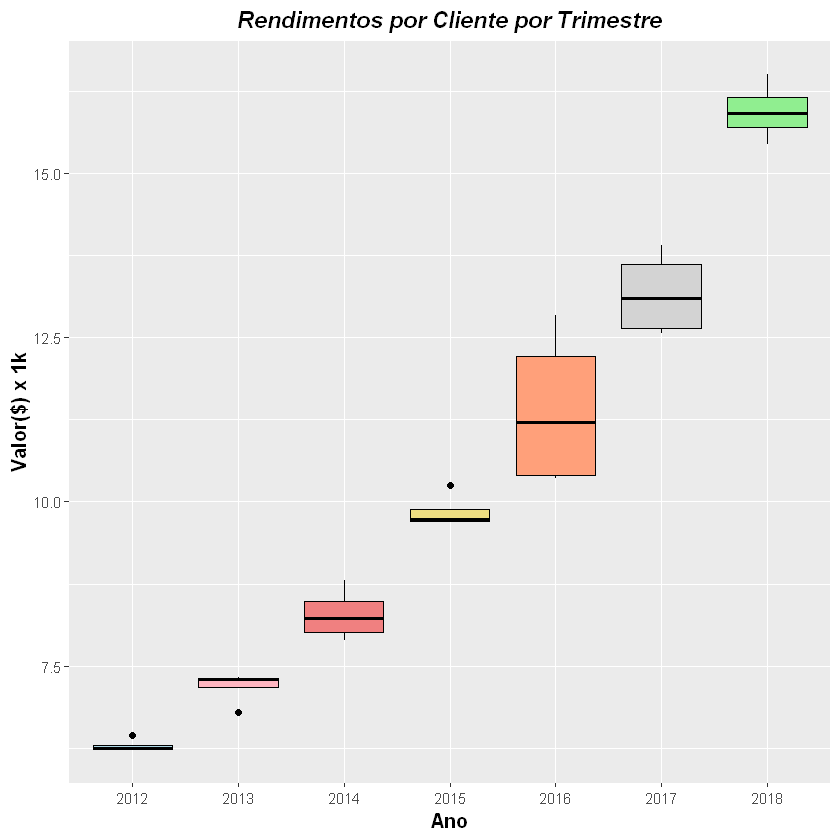

In [69]:
# Definindo as cores para cada ano:
cores = c("lightblue", "lightpink", "lightcoral", "lightgoldenrod", "lightsalmon", "lightgray", "lightgreen")
# Boxplot:
p1 = ggplot(df_data, aes(x = ano_cat, y = rendimento_por_cliente)) +
        geom_boxplot(color = "black", fill = cores) +
        # Definindo os labels e o título do gráfico:
        labs(x = "Ano", y = "Valor($) x 1k", title = "Rendimentos por Cliente por Trimestre") +
        
        # Definindo alguns elementos do "título" e dos eixos "x" e "y":
        theme(
            plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
            axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
            axis.title.y = element_text(color = "Black", size = 12, face = "bold")
        )

print(p1)

# Salvando o gráfico:
ggsave(filename = "boxplot_rendimento_cliente.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

Saving 6.67 x 6.67 in image


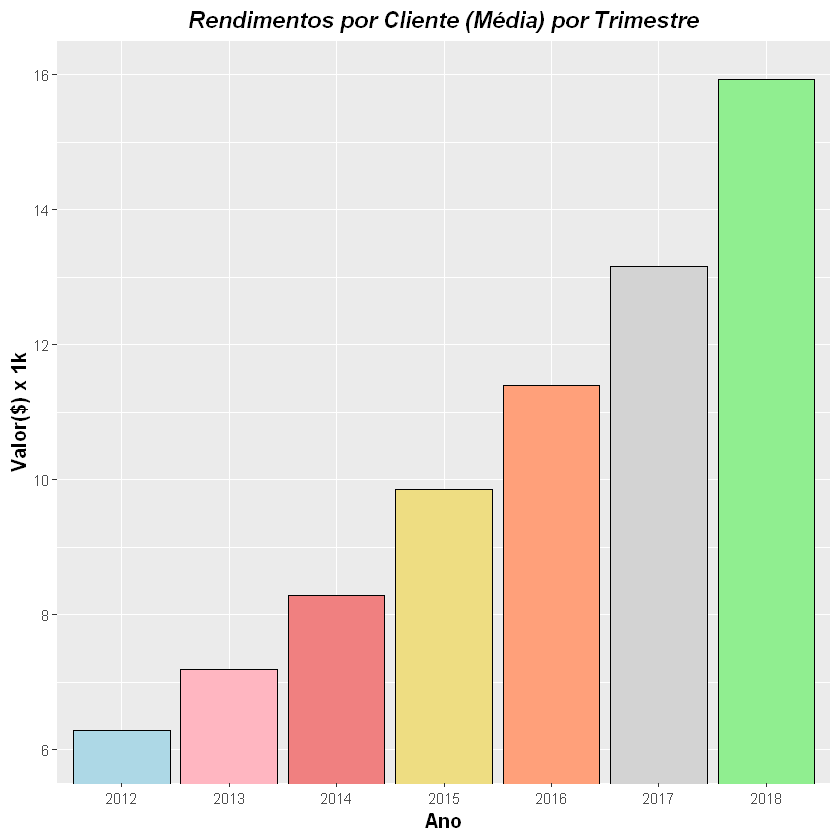

In [70]:
# Barplot:
p1 <- ggplot(media_rend_cliente, aes(x = Ano, y = Media_Rendimento_Cliente)) +
            geom_bar(stat = 'identity', col = "black", fill = cores) + theme(axis.text.x = element_text(angle = 0,
                                                                                                        hjust = 0.5)) +
            guides(fill = FALSE) + coord_cartesian(ylim = c(6.0, 16.0)) +
            ggtitle("Rendimentos por Cliente (Média) por Trimestre") + xlab("Ano") + ylab("Valor($) x 1k") +
            theme(
                plot.title = element_text(color = "Black", size = 14, face = "bold.italic", hjust = 0.5),
                axis.title.x = element_text(color = "Black", size = 12, face = "bold"),
                axis.title.y = element_text(color = "Black", size = 12, face = "bold")
            )

print(p1)

# Salvando o gráfico:
ggsave(filename = "barplot_media_rendimento_cliente.pdf", plot = p1, device = "pdf", path = PROJECT_IMG_PATH, dpi = 300)

**Análise:**

* O gráfico acima (***Boxplot***) confirma todos os testes estatísticos realizados, ou seja, que **os *rendimentos por cliente (em média, por trimestre)* aumentaram significativamente em todos os anos**;


* O gráfico acima (***Barplot***) apresenta a **`média`** dos **`Rendimentos por Cliente`** (por **`Trimestre`**) em cada um dos anos.

## <font color='black'>FIM</font>